<a href="https://colab.research.google.com/github/nataliaiglesiasbueno/APRENDIZAJE_AUTOMATICO_23_24/blob/main/LAB04_Grupo_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 4**

Asignatura: Minería de datos

Profesor: Carlos Emilio Rabazo Márquez

Grupo: A05

Integrantes: Natalia Iglesias, Sandra Millán, Ángel Pardo y Hugo Santos



**Introducción:**

Para esta práctica del laboratorio 4, exploraremos técnicas avanzadas de análisis de datos para entender mejor las características y la calidad de los vinos producidos por una prestigiosa empresa vinícola. Utilizaremos métodos de regresión y agrupamiento para extraer patrones significativos y predicciones precisas que puedan ayudar en la toma de decisiones sobre la producción futura y la mejora de la calidad del vino.

El objetivo principal es construir modelos de regresión lineal que predigan el porcentaje de alcohol en los vinos a partir de varios atributos químicos y físicos, como la acidez, el azúcar residual, el azufre y otros. Además, analizaremos la consistencia de las calificaciones de calidad dadas a los vinos utilizando técnicas de agrupamiento para identificar si existen patrones distintivos o anomalías en la evaluación de la calidad.

Se cargan las librerias a emplear

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

# **Carga de los datos**

Se carga el archivo wine_alcohol

In [ ]:
uploaded = files.upload()

Saving wine_alcohol.csv to wine_alcohol (5).csv


Se guarda la base de datos en el dataframe df

In [ ]:
df = pd.read_csv('/content/wine_alcohol.csv', header=0, sep = ';')

Se muestran los datos para confirmar la adecuación de la carga

In [ ]:
df.head(5)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


Los datos han sido cargados de manera correcta. A continuación, se analizan sus columnas/variables

In [ ]:
df.info()
print('\nValores NaN: ', df.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine type             6497 non-null   int64  
 13  alcohol               6497 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 710.7 KB

Valores NaN:  0


Todas las columnas son de tipo númerico y sin valores faltantes

Para entender más sobre el dataset, se realizará una explicación de los atributos del mismo.


- **id:** Identificador "único" para cada registro en el dataset.

- **fixed acidity:** Refiere a la concentración de ácidos que no se evaporan fácilmente del vino. Los ácidos fijos incluyen el ácido tartárico, málico, y otros. Una alta acidez fija es un marcador de vinos de zonas más frías y puede influir en el frescor y la firmeza del vino.
- **volatile acidity:** Cantidad de ácido acético en el vino, que en niveles altos puede llevar a un sabor desagradable parecido al vinagre. Es un importante indicador de la calidad del vino.
- **citric acid**: Se encuentra en pequeñas cantidades en el vino y puede añadir frescura y sabor al vino.
- **residual sugar:** Representa la cantidad de azúcar restante después de que finaliza la fermentación.
- **chlorides:** La cantidad de sales en el vino, que influye en el sabor salino general del vino.
- **free sulfur dioxide (SO2):** La parte del dióxido de azufre que no está ligada a otras moléculas y ayuda a prevenir el crecimiento microbiano y la oxidación del vino.
- **total sulfur dioxide:** La cantidad total de dióxido de azufre en el vino, incluyendo las formas libres y ligadas. Este compuesto es importante para inhibir el crecimiento de microorganismos y la oxidación.
- **density:** La densidad del vino que puede ser usada como una medida de la proporción de alcohol y azúcar. Es un indicador del grado alcohólico y de la dulzura del vino.
- **pH:** Mide la acidez o basicidad del vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3 y 4 en la escala de pH.
- **sulphates:** Se refiere a los aditivos de sulfato que pueden contribuir a los niveles de dióxido de azufre en el vino, actuando como antimicrobianos y antioxidantes.
- **quality:** Una variable entera que califica la calidad del vino, en una escala establecida (de 1 a 10).
- **wine type:** Un identificador que clasifica los vinos en dos categorías.
- **alcohol:** El porcentaje de contenido alcohólico por volumen.

# **Limpieza de la base de datos**

Se procede a analizar los ids únicos de la base de datos

In [ ]:
print(len(df['id'].unique()))

4898


Se tienen 4898 ids únicos de los 6497 registros disponibles, lo cual indica que hay **ids que se repiten**. Para asegurar la consistencia de los datos se procederá a eliminar aquellos registros que sean idénticos.

In [ ]:
len(df.drop_duplicates(keep=False))

6497

Pese a que hay ids idénticos, los valores de los registros no son los mismos, lo cual puede indicar que la base de datos wine_alcohol se trata de una unión de otras dos bases de datos diferentes. Por ello, se continua trabajando con todos ellos.

A continuación se analiza la distribución de todas las variables para confirmar si son **continuas o discretas**.

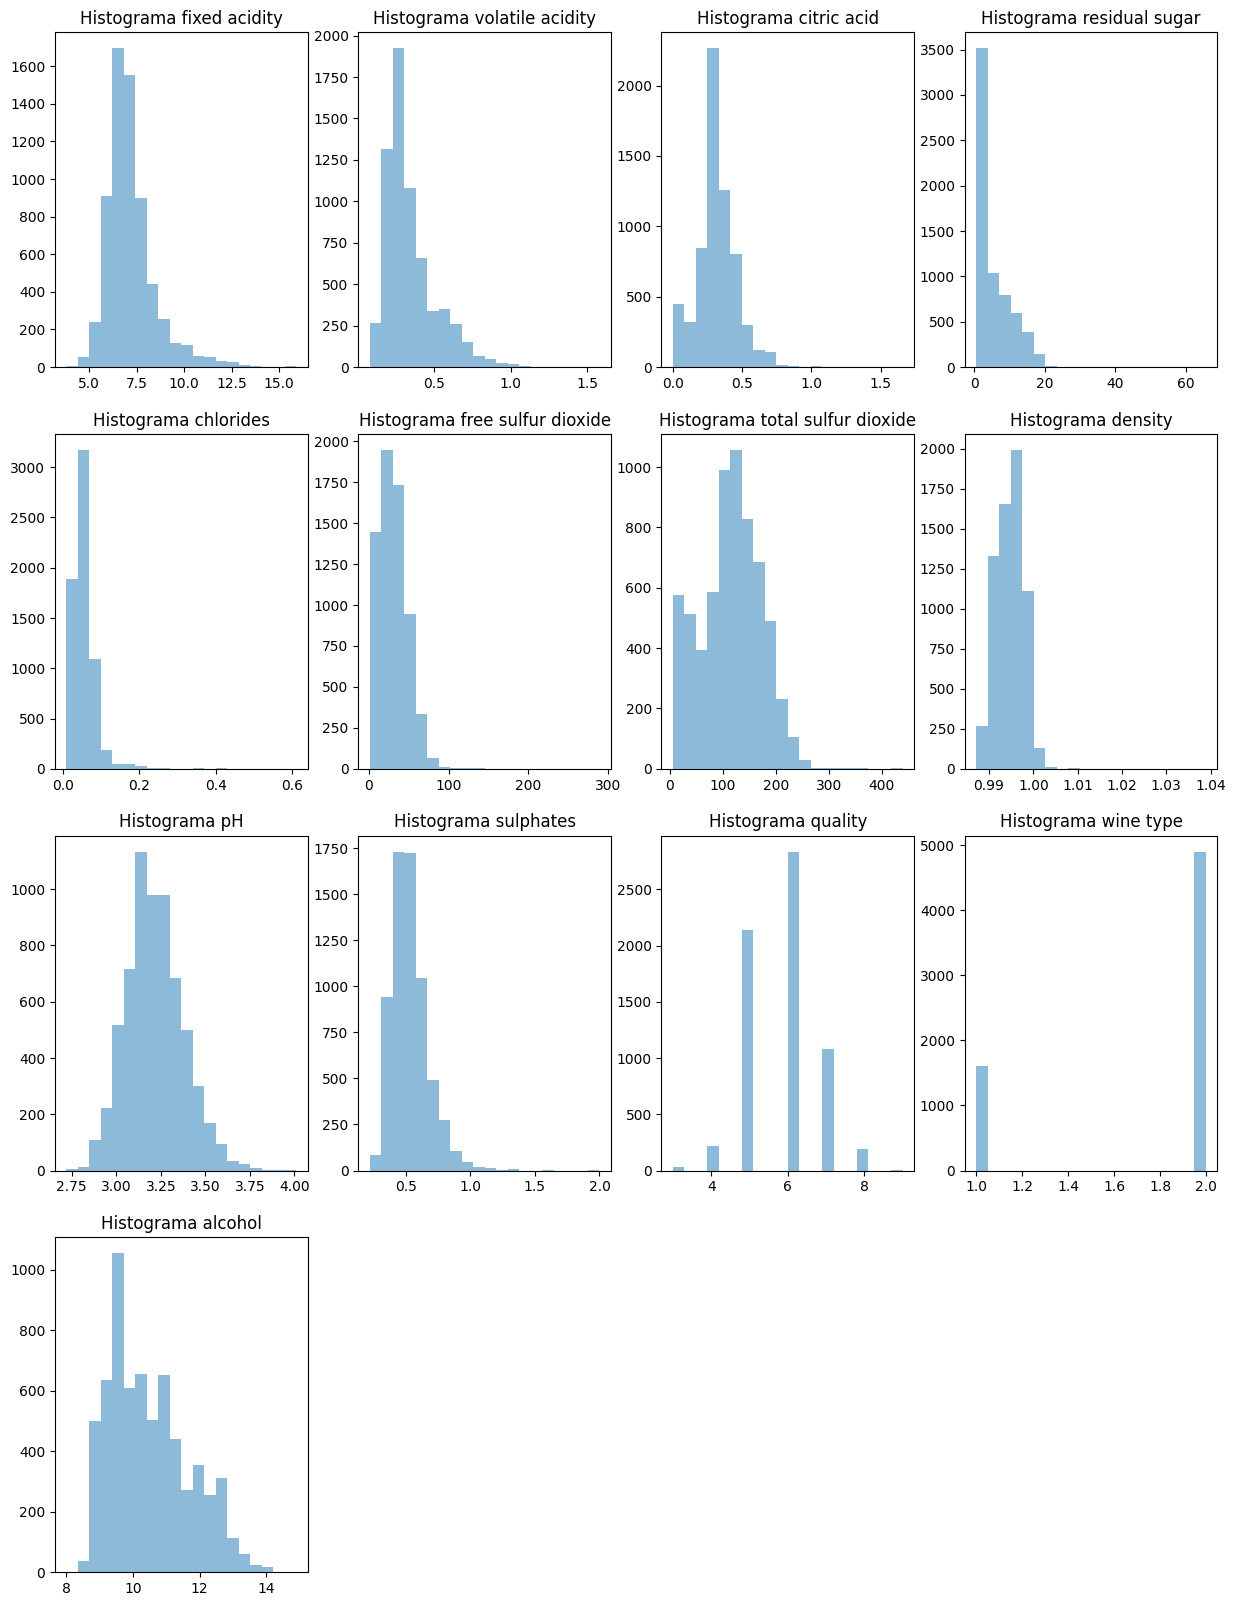

In [ ]:
plt.figure(figsize=(15, 5 * 4))
for i in range(len(df.columns)-1):
  plt.subplot(4, 4, i + 1)
  plt.hist(df.iloc[:,i+1], bins=20, alpha=0.5)
  plt.title("Histograma "+df.columns[i+1])
plt.show()

Las variables '**quality**' y '**wine type**' tienen valores limitados, por lo que se convierten a tipo object para su tratamiento. La variable **id** no influye para el análisis, por lo que es eliminada del dataframe.

In [ ]:
df['quality'] = df['quality'].astype(object)
df['wine type'] = df['wine type'].astype(object)
df = df.drop('id', axis=1)

## **Outliers**

Se analizan los valores atipicos de las variables empleando el **método de los cuartiles**, donde aquellos valores fuera del rango $(2.5Q_1 - Q_3 , 2.5Q_3-Q_1)$ se consideran outliers.

In [ ]:
def plot_histograms_with_outliers(df):
    # Filtramos solo las columnas numéricas
    numeric_cols = df.iloc[:, :].select_dtypes(include=['float64', 'int64'])

    # Calculamos el número de filas y columnas necesarias para los subplots
    num_plots = len(numeric_cols.columns)
    num_rows = (num_plots - 1) // 3 + 1

    # Configuramos el tamaño de la figura
    plt.figure(figsize=(15, 5 * num_rows))

    # Iteramos sobre cada columna numérica y dibujamos su histograma en un subplot
    for i, col in enumerate(numeric_cols.columns):
        plt.subplot(num_rows, 3, i + 1)
        plt.hist(numeric_cols[col], bins=20, alpha=0.5)
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        plt.title(col)

        # Calculamos los límites utilizando el rango intercuartílico (IQR)
        Q1 = numeric_cols[col].quantile(0.25)
        Q3 = numeric_cols[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Dibujamos las líneas verticales
        plt.axvline(x=lower_bound, color='r', linestyle='--', linewidth=2)
        plt.axvline(x=upper_bound, color='r', linestyle='--', linewidth=2)

    # Ajustamos automáticamente los espacios entre los subplots para evitar superposiciones
    plt.tight_layout()

    # Mostramos los subplots
    plt.show()

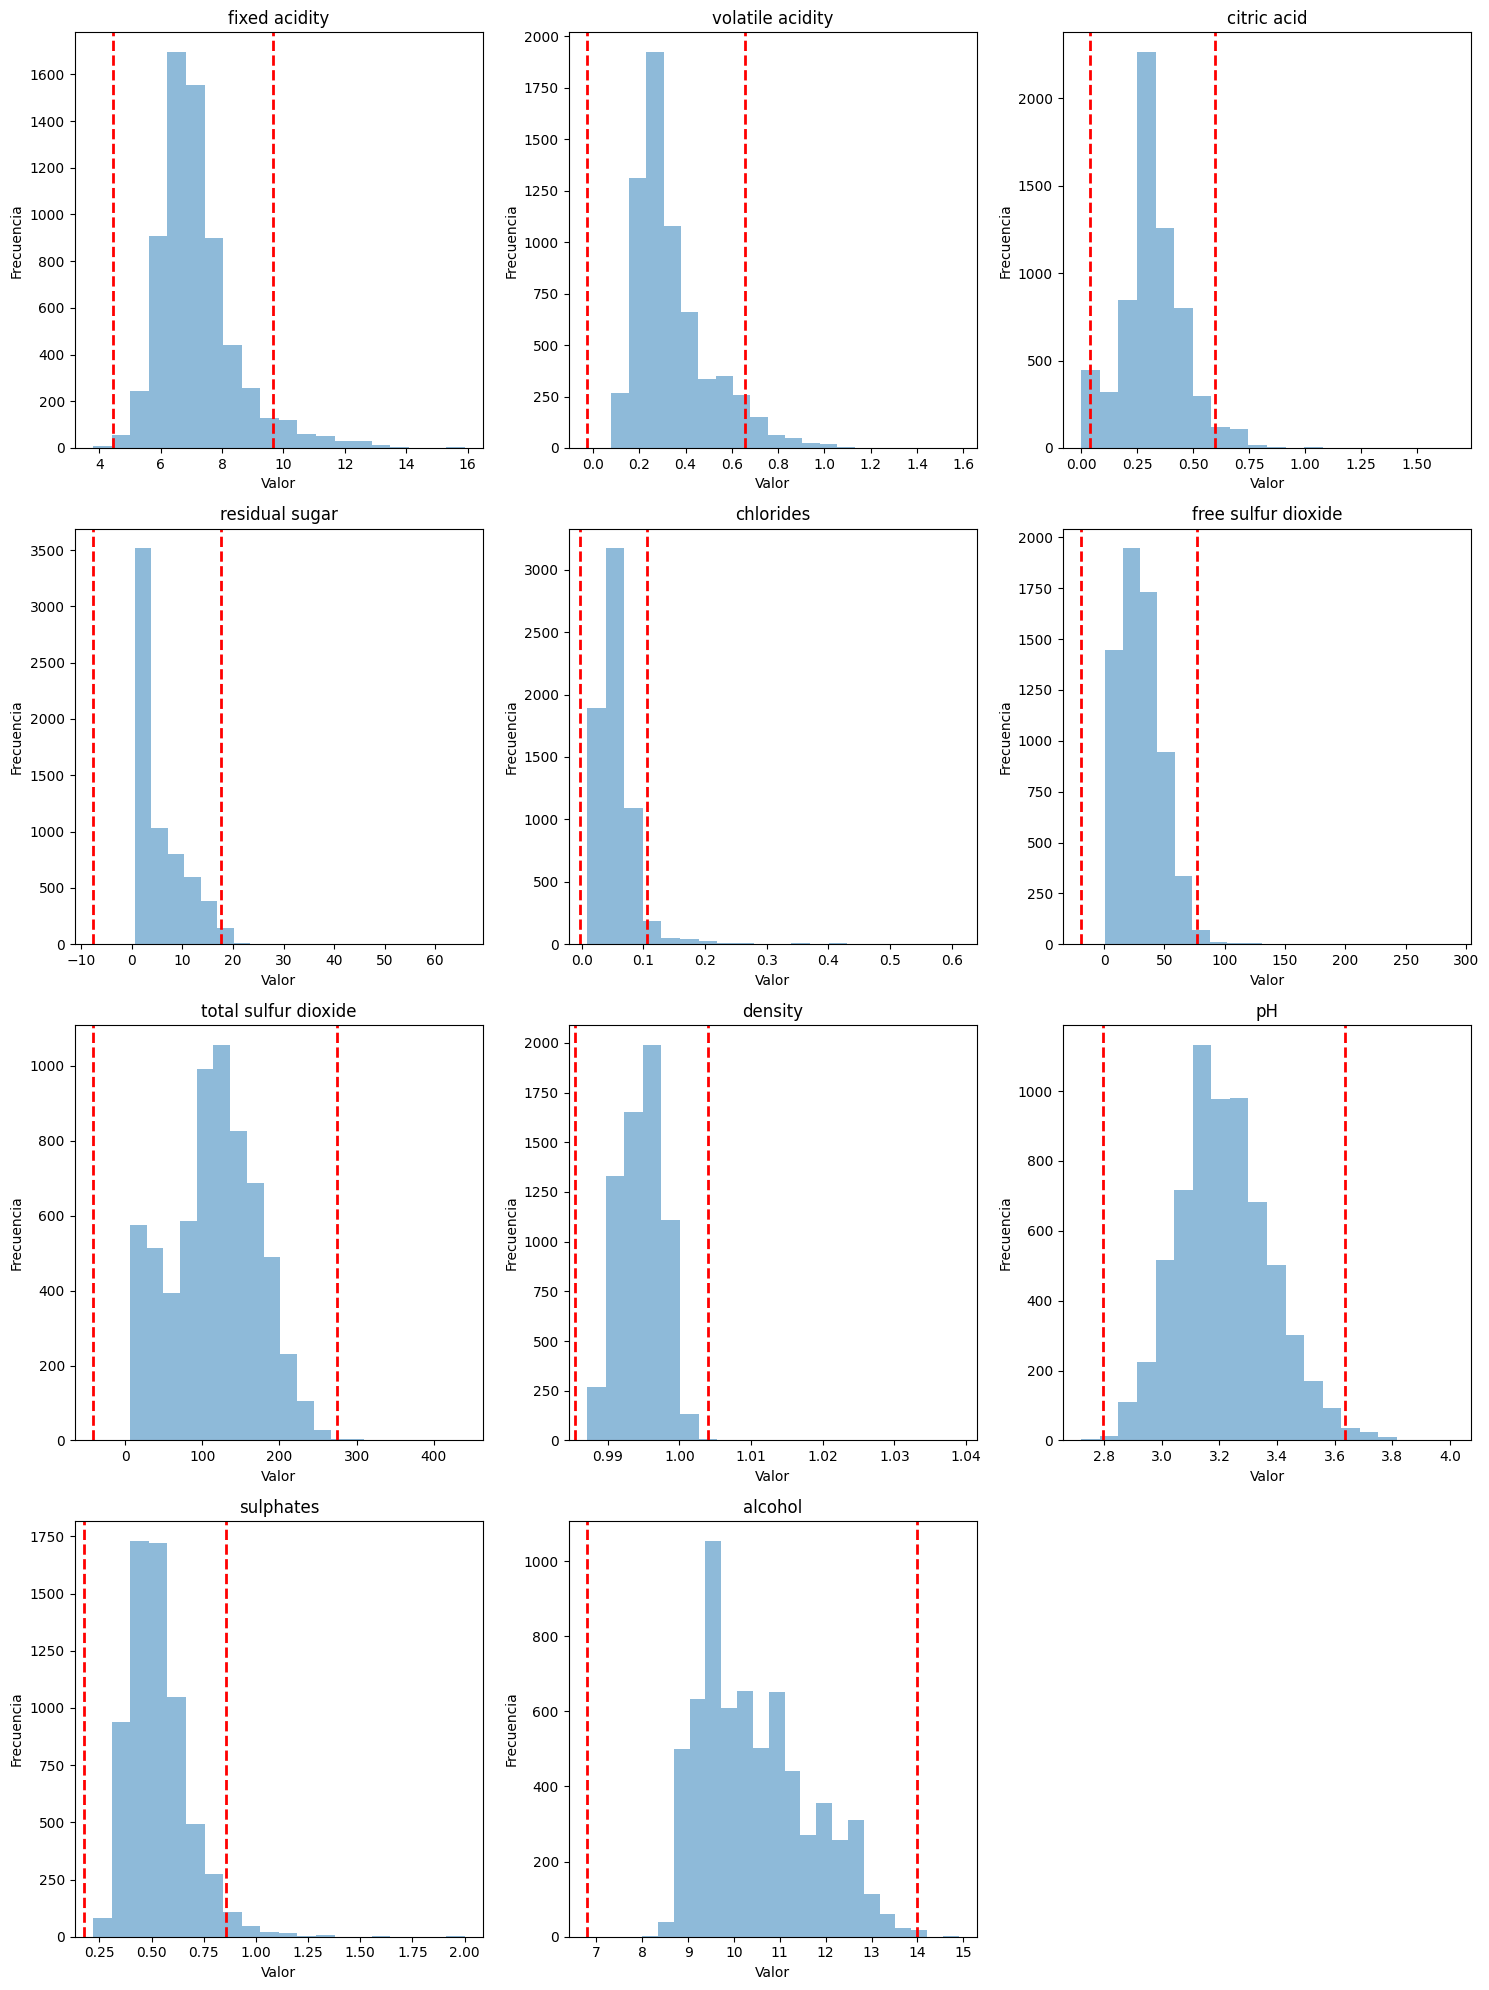

In [ ]:
plot_histograms_with_outliers(df)

Todas las variables parecen seguir **distribuciones continuas**, por lo cual no es adecuado eliminar aquellos datos que estan fuera del rango intercuartílico pero que siguen la distribución. Sin embargo, sí existen **valores exagerados** los cuales estan fuera del rango y no siguen la distribución principal, por lo que estos registros son **eliminados**.

In [ ]:
df = df[~((df['volatile acidity'] > 1) |
          (df['citric acid'] > 0.75) |
           (df['residual sugar'] > 20) |
            (df['chlorides'] > 0.2) |
             (df['free sulfur dioxide'] > 100) |
              (df['total sulfur dioxide'] > 300) |
               (df['density'] > 1.005)|
                (df['pH'] > 3.9)|
                 (df['sulphates'] > 1.25)|
                  (df['fixed acidity'] > 14)|
                    (df['alcohol'] < 8))]

Se vuelven a dibujar las gráficas para confirmar la adecuación de los datos acorde a las distribuciones.

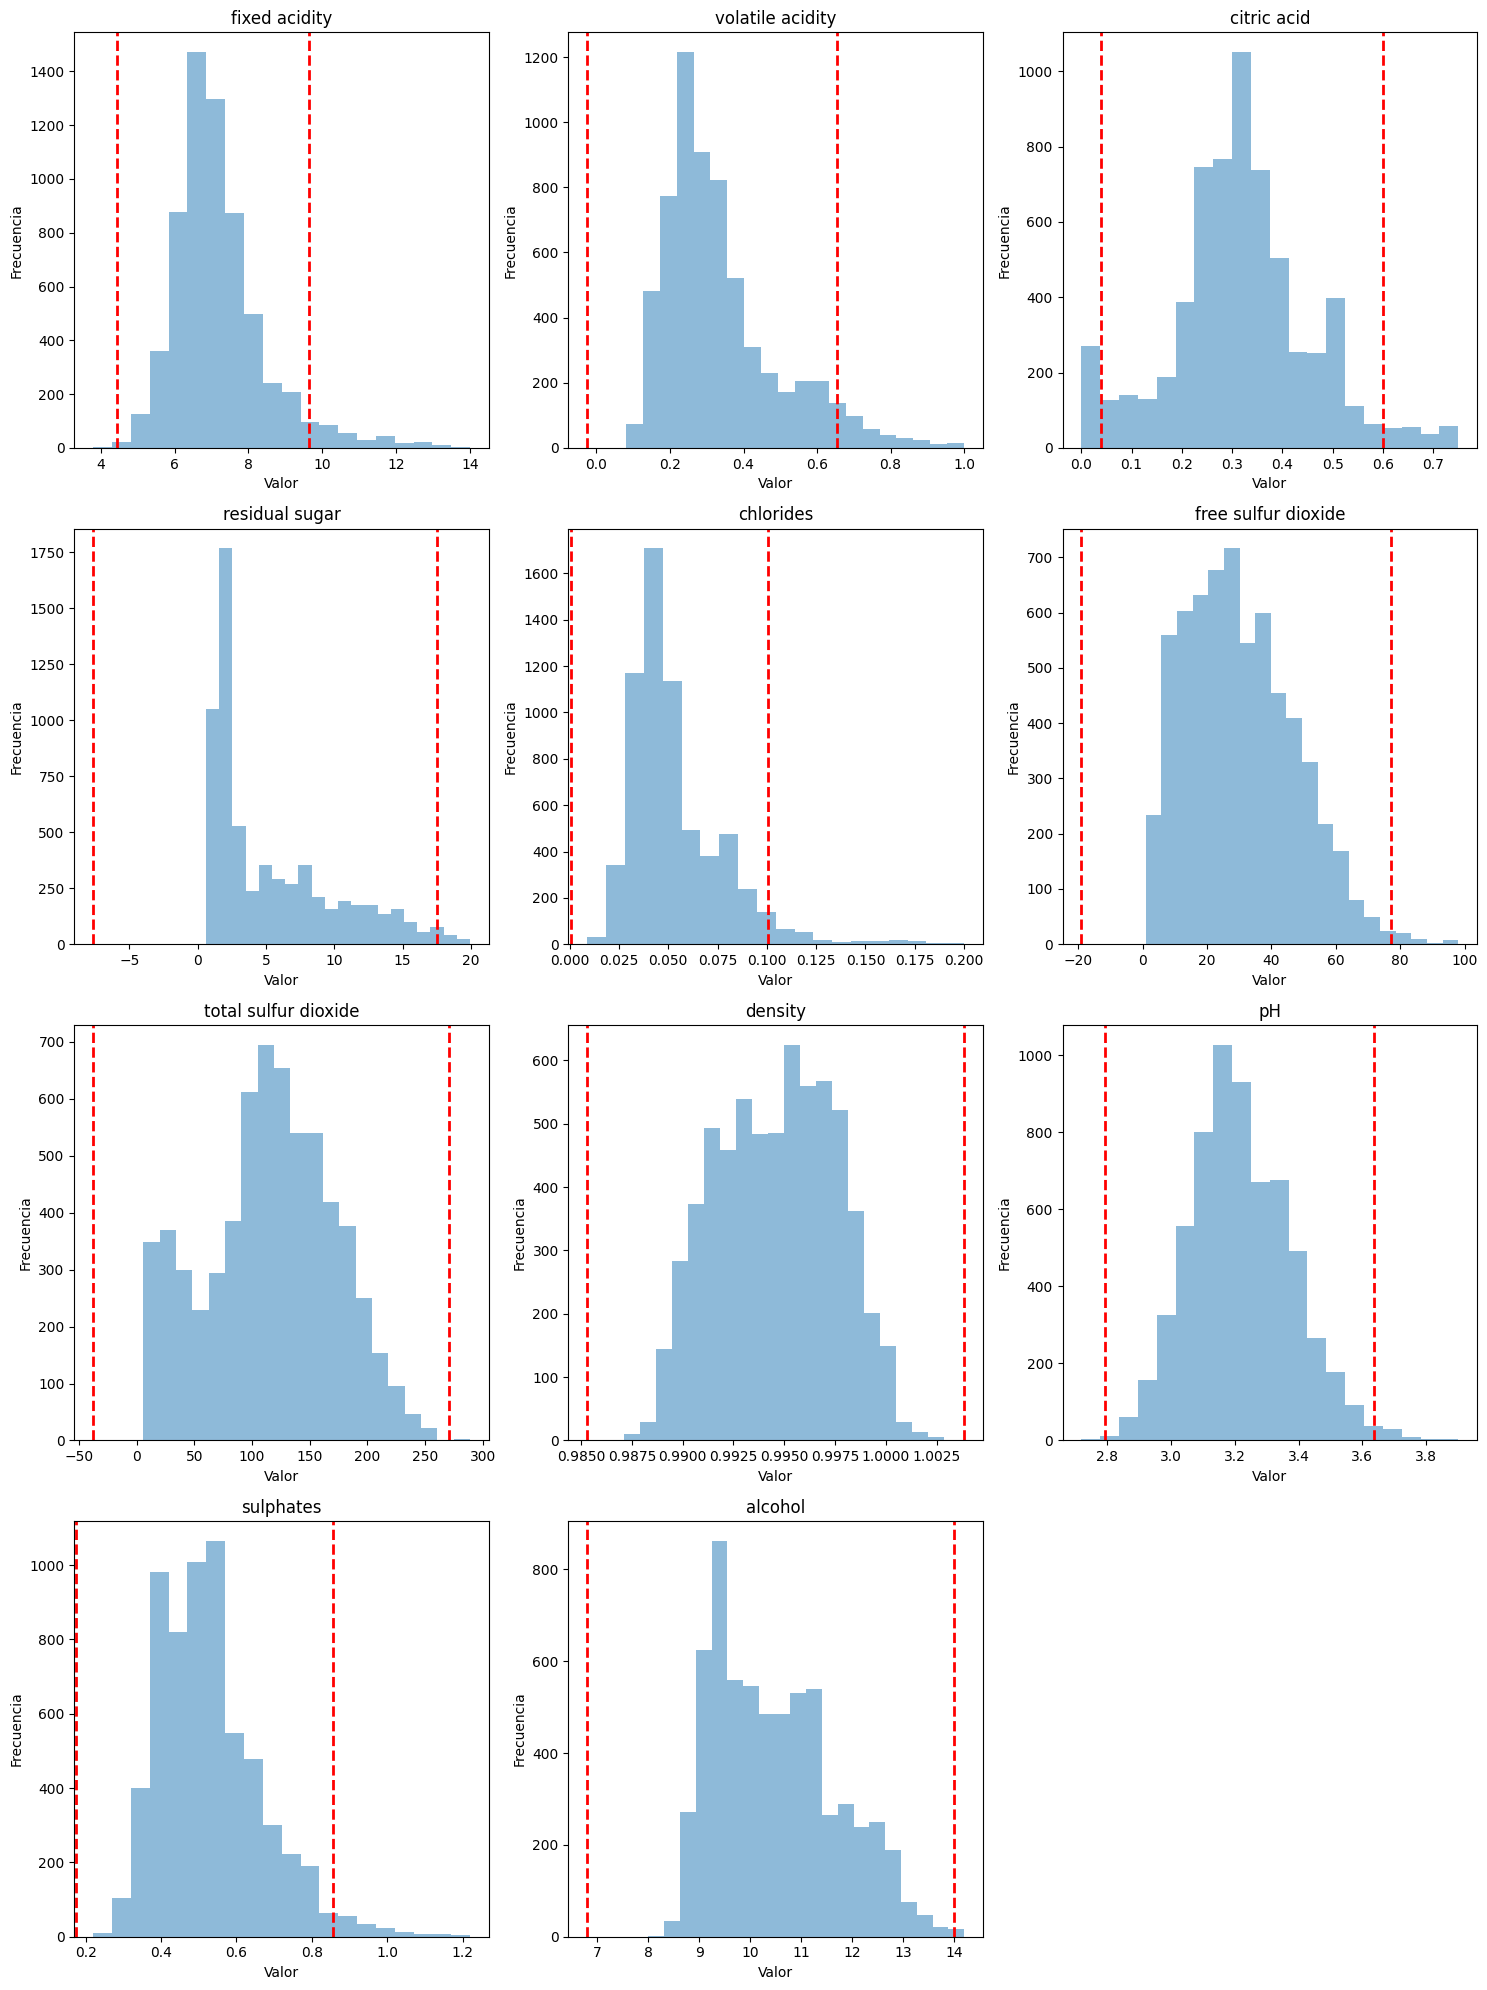

In [ ]:
plot_histograms_with_outliers(df)

Los outliers han sido eliminados de manera adecuada. Se resetean los índices del dataframe con los datos adecuados.

In [ ]:
df = df.reset_index(drop=True)

# **Ejercicio 1**

En este ejercicio, nos embarcaremos en el desarrollo de un modelo predictivo para una empresa productora de vinos. Nuestro objetivo aquí, es predecir el porcentaje de alcohol de un vino en base a una características que pueden influir en su composición. Los modelos de regresión lineal simple son de gran utilidad en la industria vitivinícola, ya que permiten anticipar propiedades del vino antes de su completo desarrollo, facilitando decisiones relacionadas con el proceso de producción y calidad del producto final.

A continuación, se realiza un proceso de estandarización de las características numéricas, lo que mejorará el rendimiento del modelo, ya que reduce el sesgo debido a la redimensión de características con rangos más amplios. Siguiendo así con una serie de ventajas:

- **Reduce la Multicolinealidad:** Al escalar todas las variables a una varianza común, se reduce la multicolinealidad, lo que puede mejorar la estabilidad y la interpretación de los coeficientes del modelo.
- **Mejora la Convergencia Numérica:** Modelos con datos no normalizados pueden sufrir de problemas numéricos que afectan la precisión de los cálculos en los algoritmos de optimización.
- **Interpretación Uniforme de Coeficientes:** La normalización permite una comparación más directa de la magnitud de los coeficientes para determinar cuáles variables tienen el mayor impacto en la variable dependiente.

In [ ]:
numeric_features = df.select_dtypes(include=['float64'])

scaler = StandardScaler()

scaled_numeric_features = scaler.fit_transform(numeric_features)

df2 = pd.DataFrame(scaled_numeric_features, columns=numeric_features.columns, index=numeric_features.index)

Se realizará a continuación un análisis sobre los atributos del dataset con el objetivo de entender las posibles relaciones que existen entre ellas y se elegirán los dos atributos que mayor relación guardan con el atributo objetivo.

Para entender las relaciones entre los atributos y encontrar aquellos que más tengan con el atributo objetivo, se imprimirá la matriz de correlación de los atributos.



Una matriz de correlación es una herramienta estadística utilizada para medir y visualizar la intensidad y la dirección de las relaciones lineales entre múltiples variables cuantitativas. Cada elemento de la matriz representa el coeficiente de correlación entre dos variables. Este coeficiente, varía entre -1 y 1, donde:

- 1 indica una correlación positiva perfecta, lo que significa que a medida que una variable aumenta, la otra también lo hace en una proporción directamente proporcional.

- -1 denota una correlación negativa perfecta, lo que implica que a medida que una variable aumenta, la otra disminuye en una proporción exactamente inversa.
- 0 sugiere que no existe una relación lineal entre las variables.

Los valores de la matriz son independientes de las unidades de medida de las variables y son sensibles a las anomalías, lo que puede influir en la estimación de la correlación si los datos contienen valores atípicos significativos.

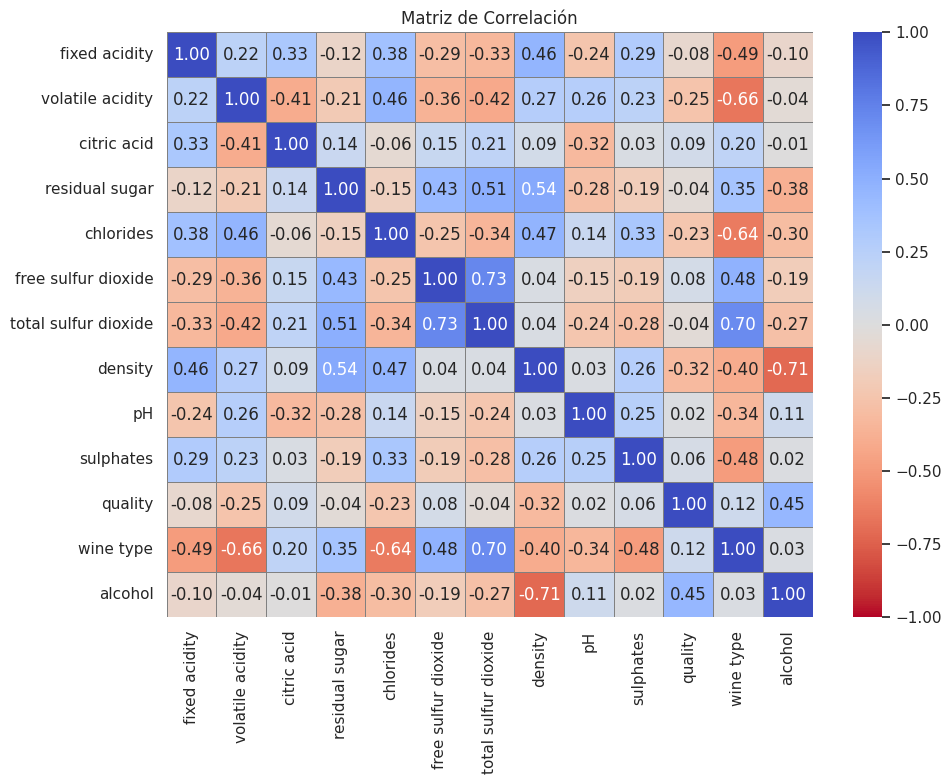

In [ ]:
correlation_matrix = df.corr()
sns.set(style='whitegrid')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot=True, fmt=".2f", vmin=-1, vmax=1, linewidths=0.5, linecolor='gray')
plt.title('Matriz de Correlación')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Se puede observar que las variables que más correlación tienen con alcohol son density y quality.

- **Correlación de density con alcohol:** Un valor de -0.71 indica que a medida que aumenta la densidad (density), tiende a disminuir el nivel de alcohol. Es decir, hay una relación inversa muy fuerte entre estas variables. Esto tiene sentido, ya que como el alcohol es menos denso que el agua, a mayor conversión de azúcar en alcohol, menor será la densidad del vino. Por lo tanto, un vino con mayor contenido alcohólico tendrá naturalmente una densidad menor, ya que gran parte del azúcar —que contribuye a una mayor densidad— ha sido convertido en alcohol.

- **Correlación de quality con alcohol:** Un valor de 0.45 indica que a medida que aumenta la calidad (quality), tiende a aumentar el nivel de alcohol. Es decir, hay una relación positiva no extremadamente fuerte, pero es lo suficientemente significativa como para sugerir que existe una tendencia positiva. Esta tendencia puede explicarse considerando varios factores que intervienen en la producción del vino y la percepción de su calidad. Primero, un mayor contenido de alcohol a menudo está asociado con vinos que han tenido un proceso de fermentación más completo. Durante este proceso, las levaduras transforman una mayor cantidad de azúcares en alcohol, lo que puede resultar en un vino con más cuerpo y un perfil de sabor más complejo y enriquecido. Estas características son típicamente valoradas en las evaluaciones de calidad del vino.



Destacamos también que la correlación que ámbas presentan con el nivel de alcohol es no determinista, lo que significa que conociendo el valor de density o de quality la variable alcohol no queda perfectamente establecida. Son del tipo: y = f(x) + u donde u es una perturbación desconocida (variable aleatoria).

Para la construcción del modelo de regresión lineal que se realizará en el siguiente apartado, se escogerá la variable density al tener más relación que quality con la variable objetivo.

La variable quality es discreta, y para incorporarla en un modelo de regresión lineal, se convierten variables dummy. Estas variables transforman cada categoría única de la variable discreta en una columna nueva, donde el valor es 1 si la observación pertenece a esa categoría y 0 en caso contrario.

Sin embargo, si solo se usan variables dummy derivadas de la variable discreta quality, no tendríamos una variable continua para capturar las tendencias lineales, lo que limitaría la eficacia del modelo en capturar y explicar variaciones en la variable dependiente.



En el siguiente código, se aplica una regresión lineal simple para estimar la relación entre la densidad (density) y el nivel de alcohol (alcohol). El modelo se ajusta utilizando el método de mínimos cuadrados para determinar los coeficientes de la línea de regresión que mejor se ajustan a los datos.

El modelo se expresa como:

**y=β0 + β1x**

Donde:

- y: Es la variable objetivo (nivel de alcohol).

- β0: Es el intercepto.

- β1: Es el coeficiente de pendiente.

El objetivo consiste en encontrar los coeficientes β0 y β1 que minimicen el error cuadrático entre las predicciones del modelo y los datos reales. El error cuadrático se define como la suma de los cuadrados de las diferencias entre los valores predichos y los valores reales.

La ecuación para estimar los coeficientes es:

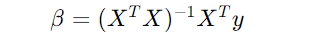

Donde:

- X: Es una matriz de diseño que contiene una columna de unos para el intercepto y los valores de la variable independiente.

- 𝑋^𝑇: Es la transpuesta de X.

- β: Es el vector de coeficientes que contiene 𝛽0 y β1.

- y es el vector de valores dependientes, en nuestro caso, alcohol.

En el código, se crea una matriz de diseño X con una columna de unos para el intercepto y una columna con los valores de density.

Se calculan los coeficientes β mediante la fórmula de mínimos cuadrados.

Se calculan las predicciones multiplicando X por β.



Cabe destacar que si no se revierten las predicciones estas también estarán en la escala estandarizada. Para interpretarlas en el contexto original (escala real de alcohol), se revertirá la estandarización.

Intercepto normalizado (beta0): -6.794152913880414e-16
Coeficiente normalizado (beta1): -0.7110018208621236


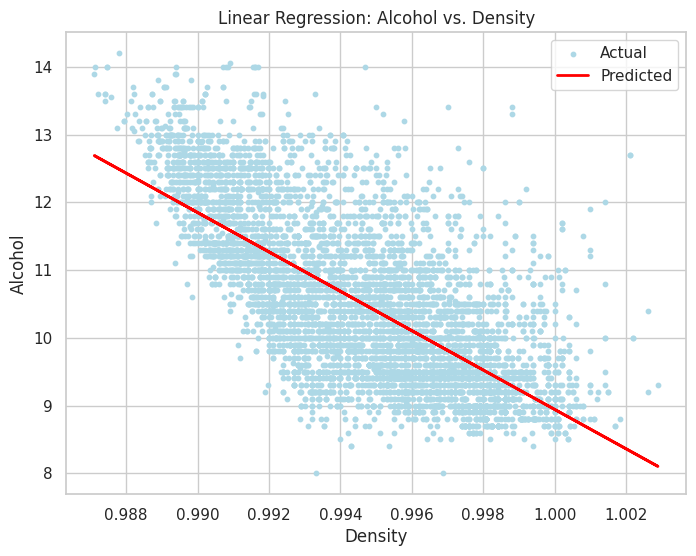

In [ ]:
# Seleccionar las características (density) y la variable objetivo (alcohol)
X = df2['density'].values
y = df2['alcohol'].values

# Añadir una columna de unos para el intercepto (beta0)
X_b = np.c_[np.ones((len(X), 1)), X]

# Cálculo de beta usando la fórmula de mínimos cuadrados
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Coeficientes
beta_0, beta_1 = beta
print(f"Intercepto normalizado (beta0): {beta_0}")
print(f"Coeficiente normalizado (beta1): {beta_1}")

# Predicciones
y_pred = X_b.dot(beta)*df['alcohol'].std()+df['alcohol'].mean()

# Visualización del resultado
plt.figure(figsize=(8, 6))
plt.scatter(df['density'], df['alcohol'], color='lightblue', s=10, label='Actual')  # Cambiar color y tamaño de los puntos
plt.plot(df['density'], y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.title('Linear Regression: Alcohol vs. Density')
plt.legend()
plt.show()


La **recta de regresión simple resultante** es la siguiente:  y=-6.79-0.71*density

A continuación, mediante el MSE comprobaremos el error obtenido con el modelo anterior.

**Error Cuadrático Medio**

Medida que representa el promedio de los cuadrados de las diferencias entre los valores reales (y) y los valores predichos.

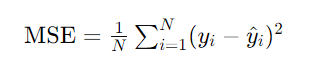

Donde:

- N es el número total de observaciones.
- yi es el valor real para la observación i.
- y^i es el valor predicho para la observación 𝑖.


**MSE = 0:** El MSE será igual a 0 cuando el modelo prediga perfectamente todos los valores.

**Un MSE más alto** indica un modelo que predice de manera menos precisa, ya que las diferencias entre los valores predichos y los reales son mayores.

El MSE tiene varias características clave:

* Siempre es no negativo, ya que los errores se
elevan al cuadrado.
* Varía desde cero hasta infinito, donde un valor más cercano a cero indica un mejor rendimiento del modelo.
* Se incrementa exponencialmente con el aumento del error, lo cual es importante para identificar y penalizar errores grandes más severamente


**Coeficiente de determinación o $R^2$**

Mide cómo de bien la variable explicativa o independiente, X, explica a la variable dependiente.




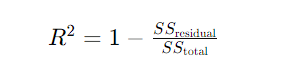

Donde:

- SSresidual es la suma de los cuadrados de los residuos.
- SStotal es la suma total de los cuadrados, que mide la variabilidad total de y.

Además, cabe destacar que:

- 0 ≤ $R^2$ ≤ 1

- $R^2 = 1$ indica un ajuste perfecto


En el código, para que el mse esté en la escala de datos original, las diferencias entre los valores reales (y) y los valores predichos se calculan sobre los datos originales sin estandarizar.

In [ ]:
y = df['alcohol']

# Calcular el Error Cuadrático Medio (MSE)
mse = np.mean((y - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse}")

# Calcular el Coeficiente de Determinación (R²)
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)
print(f"Coeficiente de Determinación (R²): {r2}")

Mean Squared Error (MSE): 0.701679580771608
Coeficiente de Determinación (R²): 0.5055235861193963


Un MSE de 0.70 indica que, en promedio, la diferencia cuadrada entre el valor real y el valor predicho es 0.70.

El coeficiente de determinación R² de 0.5 implica que el modelo está explicando el 50% de la variabilidad en el contenido de alcohol. Esto significa que la densidad tiene un poder explicativo moderado, pero también hay un 50% de variabilidad que el modelo no está capturando.

# Ejercicio 2

En este ejericio, nos enfocaremos en la aplicación de técnicas de regresión múltiple para predecir el contenido de alcohol en el vino utilizando un conjunto de datos compuesto por diversas características químicas y físicas. La regresión múltiple es una herramienta estadística poderosa que nos permite modelar la relación entre múltiples variables predictoras y una variable de respuesta continua (alcohol).


En el ejercicio anterior, no se incluyó la variable de tipo de vino en el DataFrame normalizado. Para incorporar esta variable en el análisis actual, utilizaremos una codificación "one-hot encoding". Esto implica reemplazar el valor '2' por '0', permitiendo modelar el tipo de vino como una variable dummy. De este modo, cuando el tipo de vino sea '0' (anteriormente '2'), se utilizará la base del modelo de regresión lineal múltiple. Por otro lado, cuando el tipo de vino sea '1', el modelo empleará un coeficiente diferente, ajustándose a las características específicas de ese tipo de vino. Esta estrategia permite diferenciar los efectos que cada tipo de vino tiene sobre la variable dependiente en el modelo.

In [ ]:
dfaux = df.copy()
dfaux['wine type'] = dfaux['wine type'].replace(2, 0)
categorical_features = dfaux[['wine type']]
dfm = pd.concat([df2, categorical_features], axis=1)

**Conjunto train y test**

Para evaluar y entrenar el modelo de regresión lineal múltiple de manera efectiva, se procede a dividir el conjunto de datos en dos grupos distintos: uno de entrenamiento y otro de prueba. Esta división se realiza de forma aleatoria, asegurando que el 75% de los datos se asignen al conjunto de entrenamiento, mientras que el 25% restante se reservará para el conjunto de prueba.

El conjunto de entrenamiento se utilizará para ajustar el modelo, es decir, para estimar los coeficientes que describen la relación entre las variables predictoras y la variable de respuesta. Posteriormente, el modelo entrenado se evaluará utilizando el conjunto de prueba, que contiene datos no vistos durante el proceso de entrenamiento. Esta evaluación es crucial para comprender cómo se generaliza el modelo a nuevos datos y para detectar posibles problemas de sobreajuste o subajuste.

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(dfm, test_size=0.25, random_state=42)

## **Modelo de Regresión multiple**

En la regresión lineal múltiple, la variable dependiente $Y$ se modela como una función lineal de múltiples variables independientes $X_1, X_2, ..., X_k$. La ecuación del modelo se expresa generalmente como:

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_kX_k + u $$

donde:
- $\beta_0$ es el intercepto o el valor de $Y$ cuando todas las variables independientes son cero.
- $\beta_1, \beta_2, ..., \beta_k$ son los coeficientes que representan el cambio en $Y$ asociado con una unidad de cambio en cada variable independiente correspondiente, manteniendo las otras constantes.
- $u$ es el término de error que capta todos los otros factores que influyen en $Y$ pero no están incluidos en el modelo.

### **Supuestos de Gauss-Markov**

Para que los estimadores de mínimos cuadrados ordinarios (MCO) sean los mejores lineales insesgados, el modelo debe cumplir con los cinco supuestos de Gauss-Markov:

1. **Linealidad en los parámetros**: El modelo debe ser lineal en términos de los coeficientes y el término de error.
2. **Muestreo aleatorio**: Las observaciones deben ser obtenidas mediante un proceso de muestreo aleatorio.
3. **No colinealidad perfecta**: Las variables independientes no deben ser perfectamente colineales entre sí.
4. **Media condicional cero del error**: El valor esperado del término de error, dado cualquier valor de las variables independientes, debe ser cero.
5. **Homocedasticidad**: La varianza del término de error debe ser constante para todos los niveles de las variables independientes.

**Preprocesamiento de Datos**

Antes de ajustar el modelo, utilizamos la función `sm.add_constant()` para agregar una columna de unos al conjunto de datos. Esta columna representa el intercepto del modelo, permitiendo que el modelo incluya un término de intersección en la regresión.


### **Selección de variables**

Para predecir los grados de alcohol en el vino, los expertos a menudo se enfocan en variables que están directamente relacionadas con la fermentación y la composición del vino. De las variables proporcionadas, las más útiles para predecir los grados de alcohol suelen ser:

- **Azúcar residual:** Esta variable mide la cantidad de azúcar que queda después de la fermentación. Los vinos con más azúcar residual suelen tener menos alcohol si la fermentación se detiene antes de que todo el azúcar se convierta en alcohol.
- **Densidad:** La densidad del vino puede dar una indicación del contenido de alcohol, ya que el alcohol tiene una densidad más baja que el agua. A medida que el alcohol se forma durante la fermentación, la densidad del vino disminuye.
- **Acidez volátil:** Aunque esta variable es más comúnmente utilizada para evaluar la calidad y la estabilidad del vino, puede tener alguna relación con el proceso de fermentación y, por ende, con la formación de alcohol, especialmente si la fermentación experimenta problemas.

Además, es coherente puesto que en la matriz de correlación del ejericio anterior podemos observar como la densidad y azúcar residual tienen una correlacion lineal con alcohol de -0.71 y -0.3. Sin embargo, la acidez volátil tiene una correlación con el alcohol baja. Para añadir en el estudio otras variable se utilizarán:

- **Tipo de vino** (0.45): El tipo de vino muestra una correlación moderada positiva con el alcohol. Esto podría reflejar diferencias en las prácticas de fermentación o en las variedades de uvas utilizadas entre vinos. Esta variable se implementará como variable dummy.
- **pH** (0.11): Aunque la correlación con el alcohol no es muy fuerte, el pH puede influir en la actividad de las levaduras y la eficiencia de la fermentación, lo cual a su vez puede afectar el contenido de alcohol.
- **Cloruros** (0.33): La correlación positiva moderada sugiere que los niveles más altos de cloruros podrían estar asociados con un mayor contenido de alcohol, posiblemente debido a diferencias en la composición de las uvas o en el proceso de vinificación.

**Proceso iterativo**


Se realizó una selección de características mixtas utilizando Sequential Feature Selection (SFS) para determinar el modelo óptimo basándonos en el **Mean Squared Error (MSE)**. El MSE calcula la media de los cuadrados de los errores entre las predicciones del modelo y los valores reales. Esta métrica proporciona una medida clara y fácilmente interpretable de qué tan cerca están las predicciones del modelo de los verdaderos valores observados.

**Componentes del Sequential Feature Selection (SFS):**

El Sequential Feature Selection (SFS) es una técnica poderosa utilizada para seleccionar un subconjunto óptimo de características que maximizan o minimizan una métrica de rendimiento específica. Algunos de los componentes clave del SFS incluyen:

- **Forward Step = TRUE:** El SFS comienza con un conjunto vacío de características y evalúa la adición secuencial de características para determinar cuál mejora más el rendimiento del modelo.
- **Floating Step = TRUE:** El SFS puede incluir una etapa flotante que permite agregar o eliminar características durante el proceso de selección para mejorar aún más el rendimiento del modelo.
- **Métrica de Rendimiento:** Se utiliza una métrica de rendimiento específica, como el MSE, para evaluar la calidad de los diferentes subconjuntos de características y seleccionar el mejor.

In [ ]:
# Preparar los datos
X_train = train_df.drop('alcohol', axis=1)
y_train = train_df['alcohol']
X_test = test_df.drop('alcohol', axis=1)
y_test = test_df['alcohol']

In [ ]:
def coeficientesMejores(X_train, y_train,n):
  # Crear el modelo de regresión lineal
  model = LinearRegression()

  # Configurar la selección de características mixtas
  sfs = SFS(model,
            k_features=n, # se peude poner best para que coje el mejor pero en este caso, pone todos los atributos
            forward=True,
            floating=True,
            scoring='neg_mean_squared_error',
            cv=0)

  # Ajustar el SFS al conjunto de datos de entrenamiento
  sfs = sfs.fit(X_train, y_train)

  # Resultados de la selección de características
  selected_features = X_train.columns[list(sfs.k_feature_idx_)]
  print("Características seleccionadas:", selected_features)
  return selected_features

#### **Método del CODO**




El objetivo al realizar la regresión es desarrollar un modelo que pueda explicar la variación en la variable dependiente (en este caso, el grado de alcohol de los vinos) utilizando múltiples variables independientes. Para lograr esto, es importante seleccionar un subconjunto adecuado de variables (o características) que contribuyan significativamente a predecir la variable dependiente. Además, la métrica principal que se usará aquí es el $R^2$ ajustado, el cual mide qué tan bien el modelo se ajusta a los datos ajustado por el número de características, por lo que el objetivo es maximizar este valor.

Para la selección de las características, se emplea un enfoque iterativo que evalúa cómo el modelo se desempeña con diferentes números de características. Para ello, se selecciona un conjunto inicial de características y se construye el modelo de regresión. A partir de él, se evalúa el desempeño del modelo usando el coeficiente $R^2$. Esto implica añadir o eliminar características según su impacto en el $R^2$ ajustado.

El parámetro clave en este proceso es el número de características utilizadas en el modelo. El método del codo se aplica para determinar este número óptimo.
En la regresión, este método se basa en la idea de que al aumentar el número de características, el $R^2$ ajustado del modelo aumentará. Sin embargo, llega un punto en que agregar más características no proporciona una mejora significativa en dicho valor. Este punto se identifica como el codo y se considera el número óptimo de características para el modelo.


In [ ]:
R2 = []
for i in range(len(X_train.columns)):
  selected_features = coeficientesMejores(X_train, y_train, i+1)
  model_final = sm.OLS(y_train, sm.add_constant(X_train[selected_features])).fit()
  R2.append(model_final.rsquared_adj)

Características seleccionadas: Index(['density'], dtype='object')
Características seleccionadas: Index(['density', 'wine type'], dtype='object')
Características seleccionadas: Index(['residual sugar', 'density', 'wine type'], dtype='object')
Características seleccionadas: Index(['fixed acidity', 'residual sugar', 'density', 'wine type'], dtype='object')
Características seleccionadas: Index(['fixed acidity', 'residual sugar', 'density', 'pH', 'wine type'], dtype='object')
Características seleccionadas: Index(['fixed acidity', 'residual sugar', 'density', 'pH', 'sulphates',
       'wine type'],
      dtype='object')
Características seleccionadas: Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'pH',
       'sulphates', 'wine type'],
      dtype='object')
Características seleccionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'density', 'pH', 'sulphates', 'wine type'],
      dtype='object')
Características seleccionadas: 

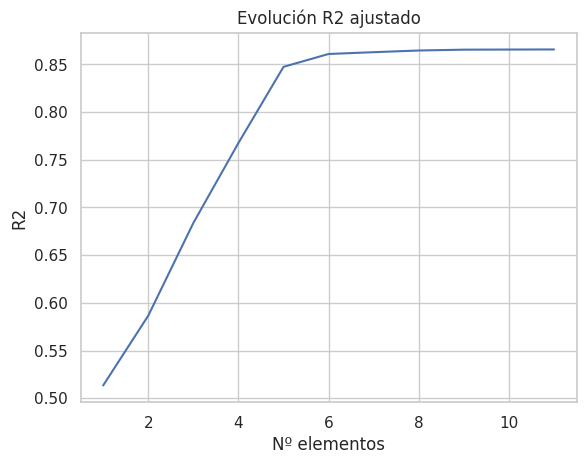

In [ ]:
plt.plot([i for i in range(1,len(R2)+1)], R2)
plt.title('Evolución R2 ajustado')
plt.xlabel('Nº elementos')
plt.ylabel('R2')
plt.show()

En la gráfica, se puede observar cómo el $R^2$ ajustado aumenta a medida que se añaden más características hasta que se estabiliza. Entre dos y cinco características, hay un incremento notable en el $R^2$ ajustado, lo que indica que cada nueva característica añadida aporta un valor significativo al modelo en términos de poder explicativo. Sin embargo, a partir de cinco características, el crecimiento en $R^2$ ajustado se ralentiza notablemente. Esto sugiere que las características adicionales aportan poco al modelo en comparación con el costo de complejidad adicional, riesgo de sobreajuste, y demanda computacional. Por lo tanto, se eligen 5 características. Este análisis ayuda a equilibrar entre un modelo con suficiente capacidad explicativa y uno que no sufra de sobreajuste, garantizando así que el modelo sea tanto generalizable como interpretable.

### **Modelos de 5 atributos**

Utilizaremos este modelo de regresión lineal múltiple para explicar el significado de los parámetros y compararlo con otro modelo donde se usan datos no normalizados. Explicaremos la métrica de error y los intervalos de confianza.

In [ ]:
selected_features = coeficientesMejores(X_train, y_train, 5)

Características seleccionadas: Index(['fixed acidity', 'residual sugar', 'density', 'pH', 'wine type'], dtype='object')


In [ ]:
# Crear un nuevo modelo con solo las características seleccionadas
model_final = sm.OLS(y_train, sm.add_constant(X_train[selected_features])).fit()
print(model_final.summary())

# Utilizar el modelo para hacer predicciones en el conjunto de test
y_pred = model_final.predict(sm.add_constant(X_test[selected_features]))

# Calcular el error cuadrático medio para el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("MSE en el conjunto de prueba:", mse)

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     5277.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        17:36:24   Log-Likelihood:                -2275.6
No. Observations:                4751   AIC:                             4563.
Df Residuals:                    4745   BIC:                             4602.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3053      0.008    -39.

La **recta de regresión múltiple** es la siguiente:  y= -0.31 + 0.63 * fixed acidity + 0.92 * residual sugar - 1.73*density + 0.37 * pH + 1.29 * wine type

Este modelo de regresión lineal proporciona información valiosa sobre la relación entre varias variables y el contenido de alcohol en una muestra de vino, basado en 4751 observaciones.

1. **Ajuste del Modelo**:
   - El **R-cuadrado** es 0.848, lo que indica que aproximadamente el 84.8% de la variabilidad en el contenido de alcohol se explica por las variables independientes incluidas en el modelo. Esto es un buen ajuste sugiriendo que el modelo tiene una capacidad predictiva fuerte.
   - El **R-cuadrado ajustado** también es 0.847, muy cercano al R-cuadrado, lo cual indica que no hay un relleno excesivo de variables innecesarias en el modelo que podrían inflar artificialmente la bondad del ajuste. Por otro lado, cabe destacar que en el modleo sin normalizar encontramos los mismos coeficiente debido en gran medida a que de por si los datos anteriormente suelen distribuirse en forma de normal como hemos analizado en la limpieza de datos.

2. **Significancia de las Variables**:
   - Todos los coeficientes son estadísticamente significativos (p < 0.05), con intervalos de confianza que no incluyen el cero, reforzando la influencia de cada variable sobre el contenido de alcohol.

   - **fixed acidity**: Un coeficiente de 0.6284 indica que, manteniendo las demás variables constantes, un aumento de una unidad en la acidez fija está asociado con un aumento de 0.6284 unidades en el contenido de alcohol.

   - **residual sugar**: Con un coeficiente de 0.9220, sugiere un impacto positivo y más fuerte sobre el alcohol en comparación con la acidez fija. Por cada unidad que aumenta el azúcar residual, el alcohol aumenta en 0.9220 unidades.

   - **density**: El coeficiente negativo (-1.7315) muestra que un aumento en la densidad está fuertemente asociado con una disminución en el contenido de alcohol. Este es el efecto más pronunciado entre las variables del modelo. Además, en el **modelo sin normalizar se obtuvo un coeficiente negativo de (-708)**, por lo que la normalización nos permite comprender mejor la importancia de cada coeficiente.

  - **pH**: Tiene un coeficiente positivo de 0.3748, lo cual podría indicar diferencias sustanciales en el contenido de alcohol debido al pH.

   - **wine type**: Tiene un coeficiente positivo de 1.2853, lo cual podría indicar diferencias sustanciales en el contenido de alcohol entre tipos de vino. Este modelo trata a la variable como dummy afectando a la pendiente, no al intercepto (ya que el mínimo es similar para ambas clases (cercano a alcohol = -2), y la pendiente sugiere un mejor ajuste).


3. **Diagnóstico del Modelo**:
  1. *Prueba de Durbin-Watson*: Esta prueba se utiliza para detectar la presencia de autocorrelación en los residuos de un análisis de regresión. La autocorrelación ocurre cuando los errores residuales no son independientes entre sí, lo cual es una suposición importante en los modelos de regresión lineal. Un resultado cerca de 2 sugiere que no hay autocorrelación; valores significativamente menores o mayores indican autocorrelación positiva o negativa, respectivamente.

  2. *Prueba de Omnibus*: Es una prueba estadística utilizada para evaluar si los residuos de un modelo de regresión siguen una distribución normal. La hipótesis nula de la prueba es que los residuos están normalmente distribuidos. Un valor de p bajo indica que los residuos no siguen una distribución normal, lo que puede afectar la validez de las inferencias hechas a partir del modelo de regresión.

  3. *Prueba de Jarque-Bera*: Similar a la prueba de Omnibus, la prueba de Jarque-Bera también verifica la normalidad de los residuos en un modelo de regresión. Esta prueba considera el sesgo (skewness) y la curtosis de la distribución de los residuos. La hipótesis nula es que los residuos tienen una distribución normal en términos de asimetría y curtosis. Un valor de p bajo en esta prueba sugiere una desviación significativa de la normalidad.

  Cada una de estas pruebas ayuda a validar las suposiciones subyacentes de los modelos estadísticos, lo que es crucial para asegurar que las conclusiones basadas en estos modelos sean confiables y válidas

   - La **Prueba de Durbin-Watson** de 1.976 está cerca de 2, lo cual sugiere que no hay autocorrelación significativa de los residuos, un indicativo de que el modelo capta adecuadamente la correlación entre las observaciones sin dejar patrones sistemáticos no explicados.
   - Las pruebas **Omnibus** y **Jarque-Bera** tienen p-valores muy bajos, indicando que los residuos no siguen una distribución normal. Esto no es problemático ya que no se requeire que los residuos se comporten como una normal.

4. **Consideraciones Generales**:
   - La multicolinealidad es un factor clave en la regresión múltiple, pues puede afectar la estabilidad de las estimaciones. En nuestro análisis, el número de condición se redujo significativamente de **1.02e+04 en el modelo sin normalizar a 5.78 en el modelo normalizado**, indicando que la normalización de datos efectivamente minimiza la multicolinealidad. Esta mejora cumple con el tercer supuesto de Gauss-Markov, que exige que no haya colinealidad perfecta entre las variables independientes, asegurando así un modelo más confiable y libre de sesgos.

El modelo es robusto y explica significativamente la variabilidad del contenido de alcohol en vinos, con todas las variables proporcionando contribuciones significativas. Además, comparandolo con el modelo para 4 atributos encontramos mejoras significativas para el modleo de 5 atributos, lo cual afianza el método del codo, ya que en el R² ajustado de (0.768 a 0.847) y un menor MSE de (0.26 a 0.16), sino que también mantuvo un balance efectivo entre la complejidad del modelo y la precisión, como reflejan los menores valores de AIC y BIC de (6561 a 4602). En conclusión, su robustez y eficacia lo hacen preferible.

###  **Error del modelo**

El **Mean Squared Error (MSE)** es una métrica comúnmente utilizada para evaluar la precisión de modelos de regresión. Calcula la media de los cuadrados de las diferencias entre los valores predichos por el modelo y los valores reales. El cuadrado de las diferencias evita problemas de cancelación de términos negativos y pone un énfasis mayor en errores grandes, además presenta solo un mínimo golbal, lo que es útil para la optimización durante el entrenamiento del modelo.

Con un MSE de 0.16 en nuestro modelo, podemos concluir que el modelo tiene una precisión razonablemente alta, con un manejo efectivo de errores y una capacidad robusta para ajustarse a los datos sin ser excesivamente influenciado por valores atípicos.

### **Intervalo de confianza del 75%**

El intervalo de confianza es una técnica estadística utilizada para estimar el rango dentro del cual se espera que caiga un parámetro poblacional, con un determinado nivel de confianza (75%).

**Pasos para el Cálculo:**

- **Determinar el nivel de significancia (α):** Para un intervalo de confianza del 75%, el nivel de significancia es 1 - 0.75 = 0.25. Este valor representa la probabilidad de error, es decir, la probabilidad de que el intervalo de confianza no contenga el verdadero valor del parámetro.
- **División de α:** Dado que la distribución t es simétrica, α se divide en dos, asignando 0.125 a cada lado de la distribución. Esto significa que estaremos observando los valores críticos que acumulan el 12.5% de las colas en ambos extremos de la distribución.
- **Uso de la Distribución t de Student:** Con los grados de libertad (en este caso, el número total de observaciones menos el número de coeficientes estimados, 4751 - 5 = 4746 grados de libertad) y el valor de α/2, buscamos en la tabla de la t de Student para encontrar el valor crítico correspondiente.
- **Cálculo del Intervalo:** El intervalo se calcula tomando la media de los coeficientes, y sumando y restando el producto del valor crítico de t y el error estándar del estimador.






In [ ]:
# Calcular el intervalo de confianza al 75% para los coeficientes
conf_int_75 = model_final.conf_int(alpha=0.25)
print("Intervalo de confianza al 75% para los coeficientes:")
print(conf_int_75)


Intervalo de confianza al 75% para los coeficientes:
                       0         1
const          -0.314173 -0.296392
fixed acidity   0.618129  0.638677
residual sugar  0.909092  0.934975
density        -1.745297 -1.717700
pH              0.366157  0.383463
wine type       1.259830  1.310770


# **Ejercicio 3**

La empresa productora de vinos no está segura de que la empresa que analiza la calidad de los diferentes vinos esté realizando el trabajo adecuadamente por lo que ha decidido analizar si los diferentes vinos que han sido producidos en los últimos años realmente tienen la calidad identificada.

Para ello se procede a aplicar un algoritmo de agrupamiento para comprobar si los vinos realmente se agrupan de manera similar a como han sido valorados por la empresa evaluadora (quality).

## **Matriz de correlación y PCA**

Se analizan las variables para confirmar que todas ellas son útiles para la agrupación. Es decir, que varias variables **no den la misma información**.

Para analizar esto se empleará de nuevo la **matriz de correlación**. Si el valor en la matriz esta cerca de |1| significará que hay una alta relación lineal entre las variables, mientras que si está cerca de 0 indicará lo contrario.

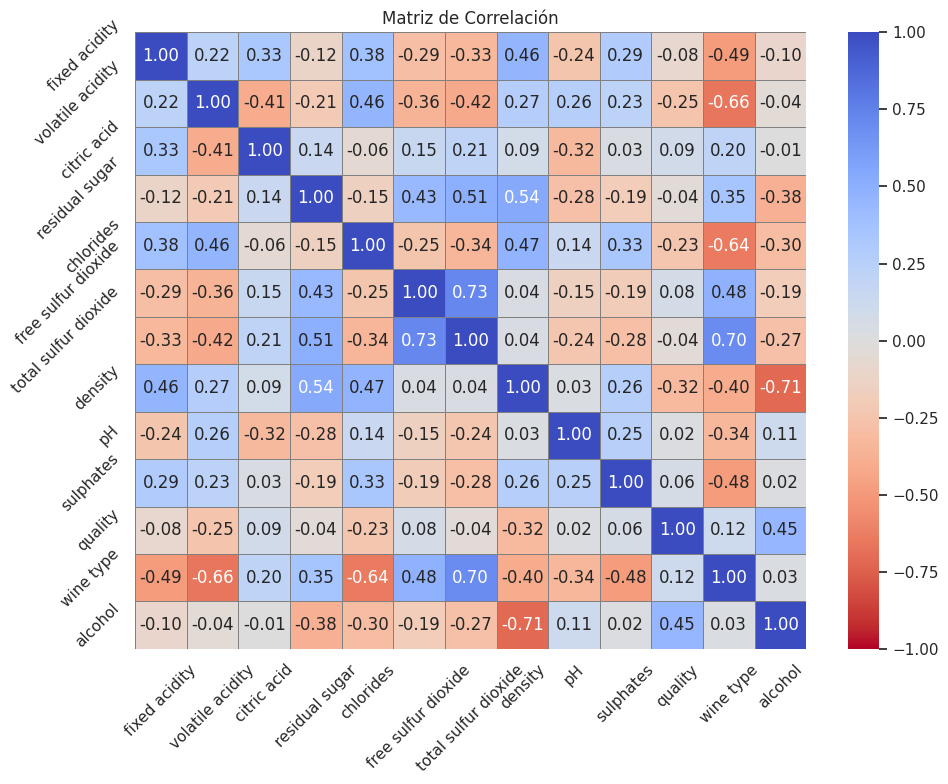

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Ajustes de estilo de seaborn
sns.set(style='whitegrid')

# Crear el mapa de calor con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot=True, fmt=".2f", vmin=-1, vmax=1, linewidths=0.5, linecolor='gray')
plt.title('Matriz de Correlación')
plt.xticks(rotation=45) # Rotar las etiquetas del eje x para que sean legibles
plt.yticks(rotation=45) # Rotar las etiquetas del eje y para que sean legibles
plt.tight_layout() # Ajustar el diseño para que se vea mejor
plt.show()

Ninguna de los pares de variables tienen una alta correlación, por lo que se conservan todas.

El siguiente paso a realizar es una reducción de dimensionalidad. Se empleará el **método de PCA** (análisis de las componentes principales) para recoger las nuevas variables, las cuales mantendrán la información de las variables originales acorde a los datos.

PCA consiste en transformar un conjunto de variables, a las que se denomina
originales, en un nuevo conjunto de variables denominadas componentes principales. Estas últimas se caracterizan por estar incorreladas entre sí y, además, pueden ordenarse de acuerdo con la información que llevan incorporada.
Una componente acaba siendo, en realidad, una combinación lineal del resto de variables, donde cada variable aporta con diferente intensidad. Esta intensidad puede ser positiva si domina en la componente. O negativa, si es escasa.

Como primer paso para aplicar PCA, se calculan los **autovalores** de la matriz de covarianzas.

In [ ]:
# Se seleccionan solo las columnas con datos numéricos float64) del DataFrame
numeric_features = df.select_dtypes(include=['float64'])

# Se inicializa el objeto StandardScaler para normalizar las características numéricas
scaler = StandardScaler()

# Se ajusta el escalador a las características numéricas y transformarlas
scaled_numeric_features = scaler.fit_transform(numeric_features)

# Creamos un nuevo DataFrame con las características numéricas escaladas
df_scaled_numeric = pd.DataFrame(scaled_numeric_features, columns=numeric_features.columns, index=numeric_features.index)

cov_matrix = np.cov(scaled_numeric_features.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# Calculamos los índices para ordenar los eigenvalores de mayor a menor
indice_ordenado = np.argsort(eigenvalues)[::-1]

# Ordenamos los eigenvalores y eigenvectores según los índices obtenidos
valores_propios_ordenados = eigenvalues[indice_ordenado]
vectores_propios_ordenados = eigenvectors[:, indice_ordenado]

# Varianza explicada por cada componente principal y la varianza acumulada explicada
varianza_explicada = [(i / sum(valores_propios_ordenados))*100 for i in valores_propios_ordenados]
varianza_acumulada_explicada = np.cumsum(varianza_explicada)

# DataFrame con la información de varianza explicada, acumulada y los valores propios para cada componente principal
df_varianza = pd.DataFrame({'Componente': range(1, len(varianza_explicada) + 1),
                            'Valor Propio': valores_propios_ordenados,  # Añadimos la columna de valores propios
                            'Varianza (%)': varianza_explicada,
                            'Varianza acumulada (%)': varianza_acumulada_explicada})


# Imprimir el DataFrame sin índices para una mejor visualización
print(df_varianza.to_string(index=False))

 Componente  Valor Propio  Varianza (%)  Varianza acumulada (%)
          1      3.165769     28.775178               28.775178
          2      2.532700     23.020907               51.796085
          3      1.565776     14.232083               66.028167
          4      0.983866      8.942825               74.970993
          5      0.640160      5.818719               80.789712
          6      0.610638      5.550378               86.340090
          7      0.505286      4.592785               90.932875
          8      0.407508      3.704037               94.636912
          9      0.338160      3.073695               97.710607
         10      0.224842      2.043696               99.754303
         11      0.027031      0.245697              100.000000


Estos autovalores (valores propios) nos dan la cantidad de información (varianza) que representa cada componente. Un 80% de la información es una suficiente representación de los datos, por lo que se elige usar **5 componentes principales**.

Los autovalores tienen, además, sus **autovectores**. Estos representan la relación que tienen las componentes con las variables originales.

In [ ]:
def print_styled_eigenvectors(eigenvectors, column_names):
    """
    Imprime un DataFrame de autovectores con estilos aplicados para mejorar la visualización.

    :param eigenvectors: Numpy array de autovectores.
    :param column_names: Lista de nombres de columnas para usar como índices en el DataFrame de autovectores.
    """
    autovectores_df = pd.DataFrame(eigenvectors,
                                   columns=[f"Autovector {i+1}" for i in range(eigenvectors.shape[1])],
                                   index=column_names)

    # Aplicamos estilos para mejorar la visualización del DataFrame
    styled_df = autovectores_df.style.set_table_styles(
        [{'selector': 'th',
          'props': [('font-size', '10pt'), ('min-width', '100px')]}]
    ).background_gradient(cmap='coolwarm_r', vmin=-0.73, vmax=0.73).format("{:.2f}")

    return styled_df

In [ ]:
styled_df = print_styled_eigenvectors(vectores_propios_ordenados, df_scaled_numeric.columns)
display(styled_df)

,Autovector 1,Autovector 2,Autovector 3,Autovector 4,Autovector 5,Autovector 6,Autovector 7,Autovector 8,Autovector 9,Autovector 10,Autovector 11
fixed acidity,0.25,0.30,-0.49,0.08,0.03,0.16,0.16,0.50,0.38,-0.23,-0.32
volatile acidity,0.39,0.10,0.27,0.24,-0.02,0.49,0.38,0.12,-0.53,0.16,-0.08
citric acid,-0.17,0.15,-0.59,-0.30,-0.09,-0.26,0.41,-0.14,-0.45,0.22,0.00
residual sugar,-0.32,0.36,0.14,0.09,0.58,0.09,0.17,-0.41,0.09,-0.03,-0.44
chlorides,0.34,0.31,0.05,-0.01,-0.56,-0.03,0.09,-0.60,0.21,-0.21,-0.08
free sulfur dioxide,-0.42,0.11,0.16,-0.28,-0.35,0.40,0.17,0.13,0.36,0.49,0.00
total sulfur dioxide,-0.47,0.13,0.13,-0.16,-0.23,0.19,0.04,0.16,-0.29,-0.72,0.05
density,0.09,0.59,0.11,-0.03,0.25,-0.10,0.10,0.09,0.11,0.00,0.73
pH,0.23,-0.13,0.45,-0.50,0.09,-0.42,0.43,0.22,0.12,-0.10,-0.20
sulphates,0.29,0.14,-0.07,-0.68,0.20,0.34,-0.48,-0.08,-0.16,0.01,-0.08


A continuación, se analizan la representación de cada una de las 5 componentes elegidas:
- **CP1**: Asociado con valores moderados de ácido fijo y volátil, bajos niveles de dióxido de azufre, y altos niveles de cloruros.
- **CP2**: Indica vinos con alta densidad y azúcar residual, pero bajos niveles de alcohol.
- **CP3**: Indica vinos con bajo contenido de ácido cítrico y fijo, y alto contenido de pH.
- **CP4**: Está asociado con bajos niveles de pH y sulfitos.
- **CP5**:  Indica vinos con alto contenido de azúcar residual, pero bajo contenido de cloruros y dióxido de azufre.

In [ ]:
# Componentes principales utilizando los primeros tres vectores propios ordenados
componentes_principales = vectores_propios_ordenados[:, :5]

# Transformamos los datos originales normalizados utilizando los componentes principales
datos_transformados_pca = np.dot(df_scaled_numeric, componentes_principales)

# DataFrame con los datos transformados en PCA, incluyendo los componentes principales y el nombre de la ciudad
df_pca = pd.DataFrame(datos_transformados_pca, columns=['CP1', 'CP2', 'CP3', 'CP4', 'CP5'])
df_pca = pd.concat([df_pca, df[['wine type', 'quality']]], axis=1)

Se vuelva a realizar la matriz de correlación para comprobar que las variables no dan la misma información

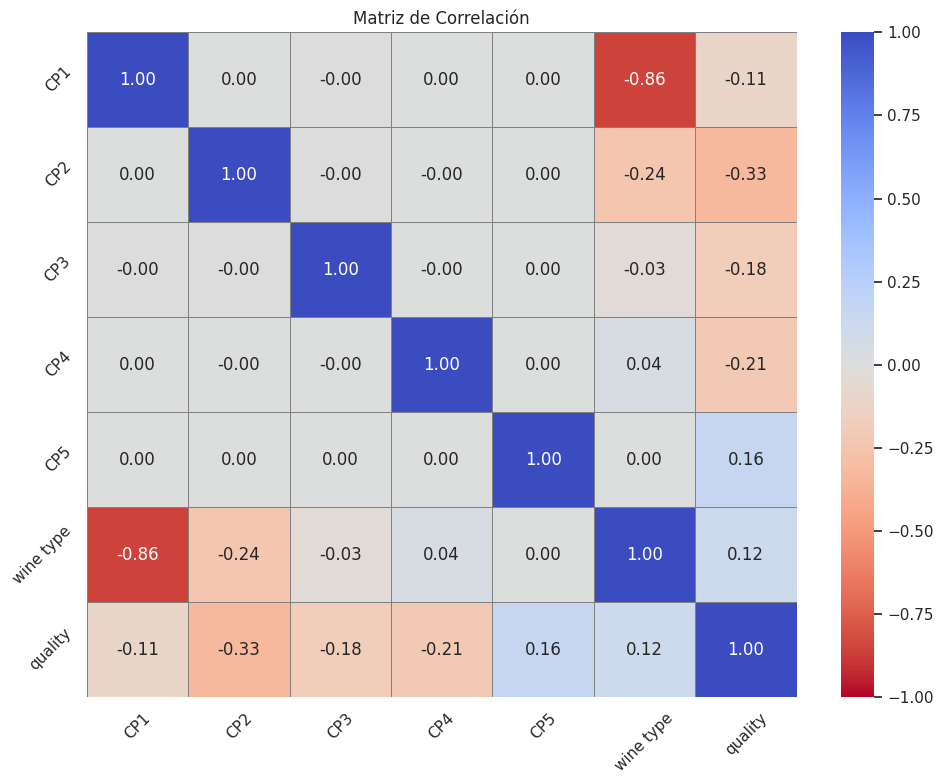

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df_pca.corr()

# Ajustes de estilo de seaborn
sns.set(style='whitegrid')

# Crear el mapa de calor con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot=True, fmt=".2f", vmin=-1, vmax=1, linewidths=0.5, linecolor='gray')
plt.title('Matriz de Correlación')
plt.xticks(rotation=45) # Rotar las etiquetas del eje x para que sean legibles
plt.yticks(rotation=45) # Rotar las etiquetas del eje y para que sean legibles
plt.tight_layout() # Ajustar el diseño para que se vea mejor
plt.show()

Se tiene que las caracteristicas de la **componente principal 1** son aquellas que definen que un **vino sea de tipo 1 o tipo 2**. Un alto valor de la componente 1 indicará que se trata de un vino de tipo 2, mientras que si el valor es bajo será de tipo 1. Debido a esto, la variable 'wine type' no será necesaria a la hora de realizar el agrupamiento.

# **Metodo del codo**

El objetivo a la hora de realizar clustering (agrupación) es el de obtener grupos con caracteristicas similares de manera que los elementos pertenecientes a un **mismo grupo sean lo mas parecidos entre ellos**, y que sean lo **mas diferentes posibles de elementos de otros grupos**.

Para lograr esto se empleará el algoritmo **Kmeans**. Este algoritmo emplea k **centroides** (valor de la media del clúster) y realiza los siguientes pasos:
1. Calcula las distancias de todos los puntos a los k centroides.
2. Asigna cada punto al clúster perteneciente al centroide más cercano
3. Para los k clusteres calcula los nuevos centroides
4. Si los centroides han cambiado se vuelve al paso 1. Si los centroides no se han visto modificados el algoritmo finaliza, dando como resultado los k centroides y sus clusteres.

De esta forma, se tiene que a la hora de aplicar este algoritmo es esencial la elección del parametro k, el cual es el valor de los clústeres que se quieren obtener. Para la elección de este parametro se empleará el método del codo sobre la incercia.

'**inertia_**' es un atributo de los modelos de clustering, como KMeans, que mide la suma de las distancias al cuadrado de cada punto de datos dentro de un clúster respecto a su centroide. En otras palabras, representa cómo de compactos son los clústeres. El objetivo es **minimizar** este valor.

El **método del codo** se basa en la idea de que al aumentar el número de clusters, la inercia del modelo disminuira. Sin embargo, llega un punto en el que agregar **más clústers no proporcionará una mejora significativa** en la incercia. Este punto se identifica como el "codo" en un gráfico de incercia contra número de clusters, y el número de clusters en este punto se considera el óptimo para la partición de los datos.

Lo primero para aplicar el método es normalizar los datos y quitar las variables que no se usarán para el agrupamiento (quality y wine type)

In [ ]:
# Escala los datos para que todas las características tengan media 0 y varianza 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca.drop(['quality', 'wine type'], axis=1))

Se aplica el algoritmo Kmeans hasta k = 40, calculando la inercia para cada k.

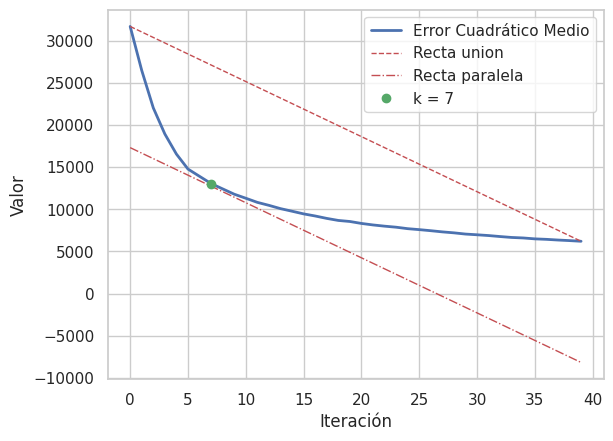

In [ ]:
ecm = []
for i in range(40):
  kmeans = KMeans(n_clusters=i+1, random_state=42)
  kmeans.fit_predict(df_scaled)
  ecm.append(kmeans.inertia_)

# Crear un array de valores para la recta
x = np.linspace(0, len(ecm)-1, len(ecm)-1)

# Pendiente deseada
m = (ecm[-1]-ecm[0])/39

# Dibujar el error cuadrático medio
plt.plot(ecm, label='Error Cuadrático Medio', linewidth = 2)

# Dibujar la recta con la pendiente deseada
plt.plot(x, m * x+ecm[0], 'r--', label=f'Recta union', linewidth = 1)

# Dibujar la recta con la pendiente deseada
plt.plot(x, m * (x+22)+ecm[0], 'r-.', label=f'Recta paralela', linewidth = 1)

# Punto verde en (7, ecm[7])
plt.plot(7, ecm[7], 'go', label='k = 7')

# Configuración de la gráfica
plt.xlabel('Iteración')
plt.ylabel('Valor')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

Se tiene que el codo de la gráfica se encuentra en k=7, por lo que el **número óptimo de clústeres es 7**.

# **Agrupamiento**

Se aplica el algoritmo k-means para obtener 7 clústeres

In [ ]:
# Define el número de clusters que deseas obtener
n_clusters = 7

# Aplica el algoritmo de K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Añade la columna de clusters al DataFrame original
df_pca['Cluster'] = clusters

Para confirmar la adecuación del agrupamiento se muestran los datos coloreados por cluster sobre una grafica 3D

In [ ]:
def update_plot(x_axis, y_axis, z_axis, azimuth, elevation):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Haz el scatter plot
    sc = ax.scatter(df_pca[x_axis], df_pca[y_axis], df_pca[z_axis], c=clusters, cmap='tab20')

    # Añade etiquetas y título
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.set_zlabel(z_axis)
    ax.set_title('Clustering Result')

    # Rotar la gráfica
    ax.view_init(elevation, azimuth)

    # Muestra la gráfica
    plt.show()

# Crea widgets para elegir los ejes y los ángulos de rotación
x_dropdown = widgets.Dropdown(options=['CP1', 'CP2', 'CP3', 'CP4', 'CP5'], value='CP1', description='X Axis:')
y_dropdown = widgets.Dropdown(options=['CP1', 'CP2', 'CP3', 'CP4', 'CP5'], value='CP2', description='Y Axis:')
z_dropdown = widgets.Dropdown(options=['CP1', 'CP2', 'CP3', 'CP4', 'CP5'], value='CP4', description='Z Axis:')
azimuth_slider = widgets.FloatSlider(value=300, min=0, max=360, step=15, description='Azimuth:', continuous_update=False)
elevation_slider = widgets.FloatSlider(value=30, min=0, max=360, step=15, description='Elevation:', continuous_update=False)

# Muestra los widgets
display(widgets.interactive(update_plot, x_axis=x_dropdown, y_axis=y_dropdown, z_axis=z_dropdown, azimuth=azimuth_slider, elevation=elevation_slider))


interactive(children=(Dropdown(description='X Axis:', options=('CP1', 'CP2', 'CP3', 'CP4', 'CP5'), value='CP1'…

Se observa que los clústeres obtenidos están **bien diferenciados en estos 5 ejes**, por lo que el agrupamiento ha sido realizado de manera correcta y eficiente.

A continuación, se muestra como se comportan los diferentes clústeres en cada componente principal.

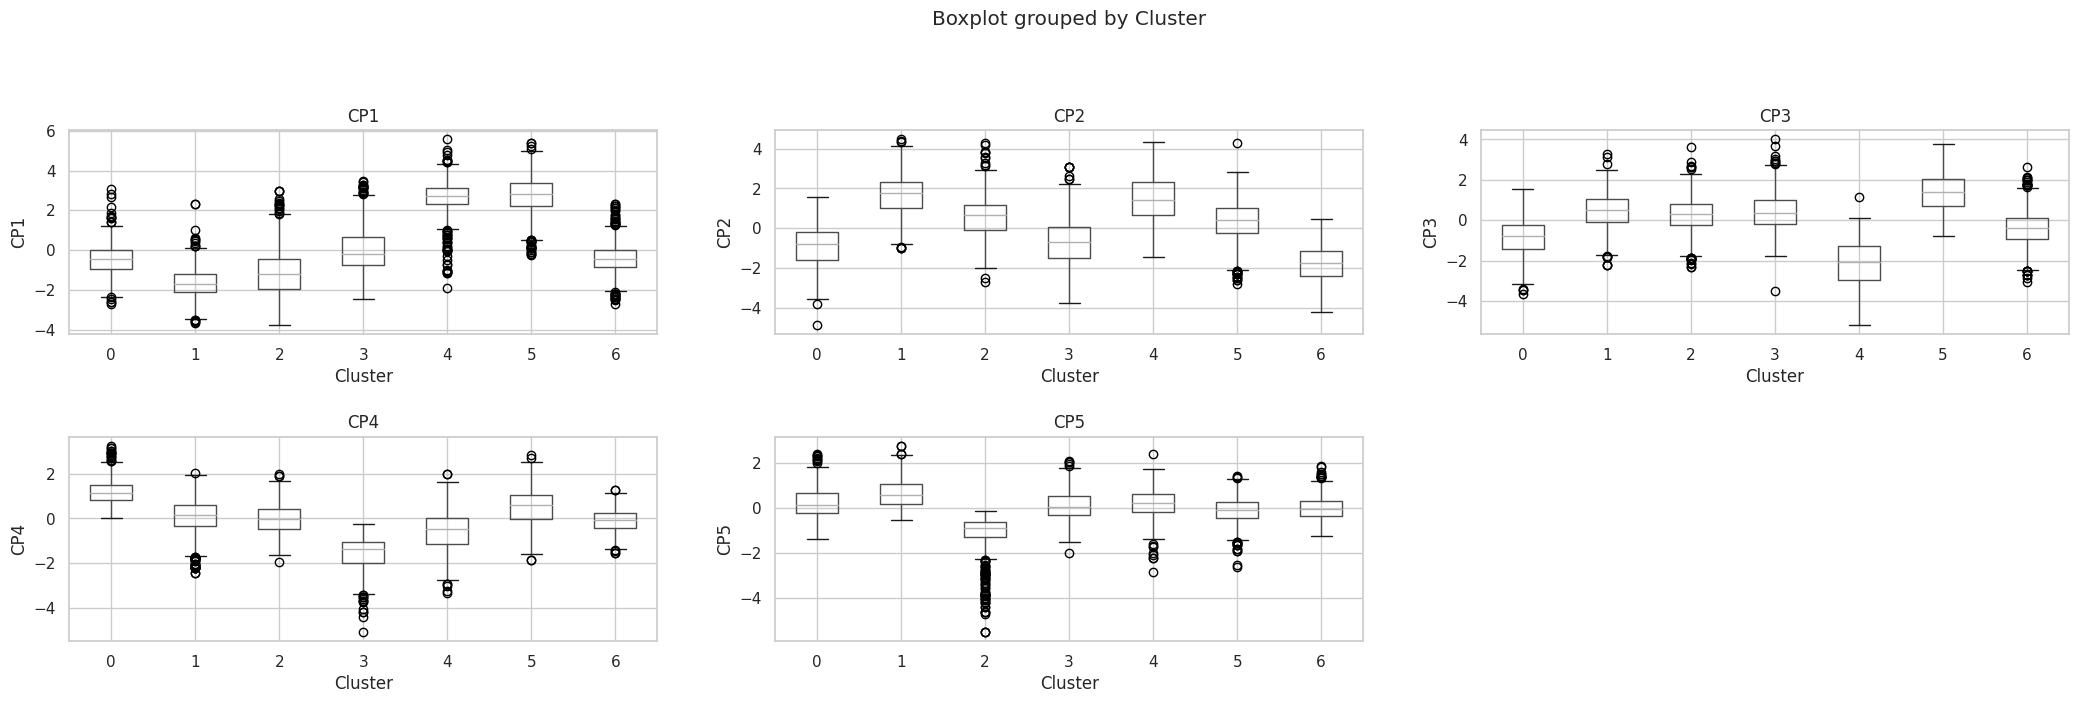

In [ ]:
numeric_features = df_pca.select_dtypes(include=['float64', 'int64']).columns.difference(['Cluster'])

plt.figure(figsize=(25, 5*3))
# Itera sobre cada característica numérica y crea un diagrama de caja para cada una dentro de cada cluster
for i in range(len(numeric_features)):
    plt.subplot(4, 3, i+1)  # ajusta la cuadrícula de subtramas
    df_pca.drop(['quality', 'wine type'], axis=1).boxplot(column=numeric_features[i], by='Cluster', ax=plt.gca())
    plt.xlabel('Cluster')
    plt.ylabel(numeric_features[i])
plt.subplots_adjust(hspace=0.5)
plt.show()

- **CP1**: Destacan los valores bajos de los clústeres 1 y 2, y los valores altos de los clústeres 4 y 5.
- **CP2**: Destacan los valores bajos del clúster 6, y los valores altos de los clísteres 1 y 4.
- **CP3**: Destacan los valores bajos del clúster 4, y los valores altos del clúster 5.
- **CP4**: Destacan los valores bajos del clúster 3, y los valores altos del clúster 0.
- **CP5**: Destacan los valores bajos del clúster 2.

En base a estos resultados se tiene que todas las componentes empleadas para el agrupamiento son útiles y ayudan a diferenciar de manera efectiva los diferentes grupos, por lo que son variables necesarias para el análisis.

Las descripciones de los clusteres en base a las componentes y su significado se realizara mas adelante.

A continuación, se imprimen los porcentajes de pertenencia de cada clúster a los vinos de tipo 1 y tipo 2.

In [ ]:
colores = []
colores.append(plt.cm.tab20.colors[0])
colores.append(plt.cm.tab20.colors[6])
colores.append(plt.cm.tab20.colors[3])
colores.append(plt.cm.tab20.colors[10])
colores.append(plt.cm.tab20.colors[13])
colores.append(plt.cm.tab20.colors[16])
colores.append(plt.cm.tab20.colors[19])

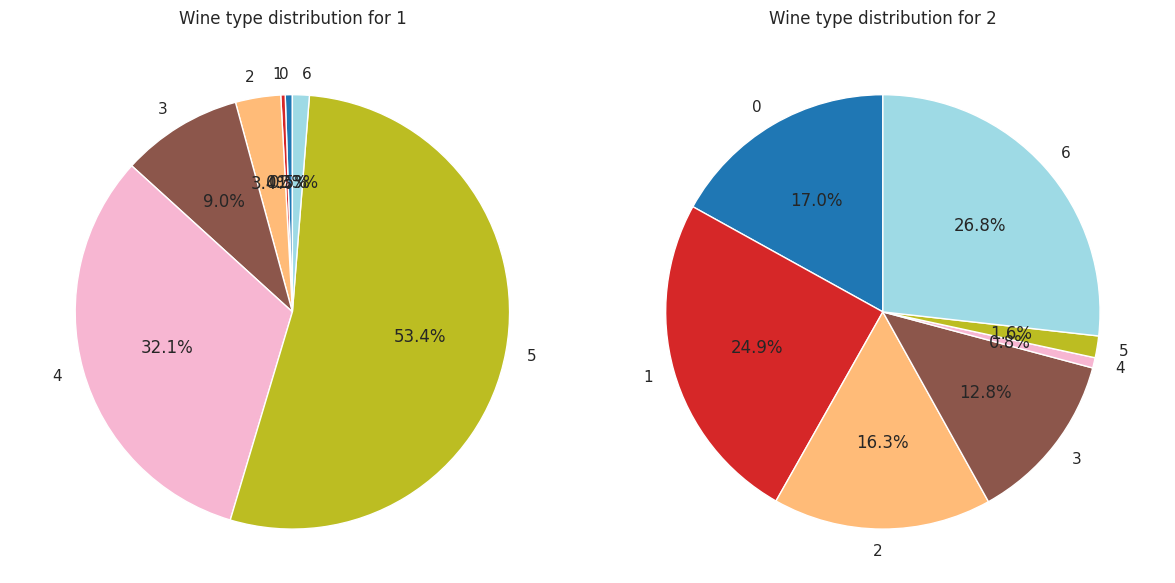

In [ ]:
def plot_class_pie(df, class_column, cluster_column, colors=None):
    unique_classes = df[class_column].unique()
    num_classes = len(unique_classes)

    # Configuramos los colores
    if colors is None:
        colors = plt.cm.tab10.colors
    num_colors = len(colors)

    # Configuramos los subplots
    fig, axs = plt.subplots(1, num_classes, figsize=(6*num_classes, 6))

    for i, class_value in enumerate(unique_classes):
        class_df = df[df[class_column] == class_value]

        # Agrupamos por la columna de la clase y 'Cluster', y contamos las ocurrencias
        class_counts = class_df.groupby(cluster_column).size()

        # Seleccionamos los colores adecuados
        class_colors = [colors[idx % num_colors] for idx in class_counts.index]

        # Creamos el pie chart
        axs[i].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=class_colors)
        axs[i].set_title(f'{class_column.capitalize()} distribution for {class_value}', pad=20)
        axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
plot_class_pie(df_pca, 'wine type', 'Cluster', colores)

Se tiene que los clústeres 4 y 5 representan en su gran mayoría a los vinos de tipo 1, mientras que los clústeres 0, 1, 2 y 6 representan a los de tipo 2. El clúster 3 son aquellos vinos con características similares pese a ser de tipo 1 o 2.

Como objetivo principal, se analizan los clusteres obtenidos en funcion de la calidad (**quality**) dada.

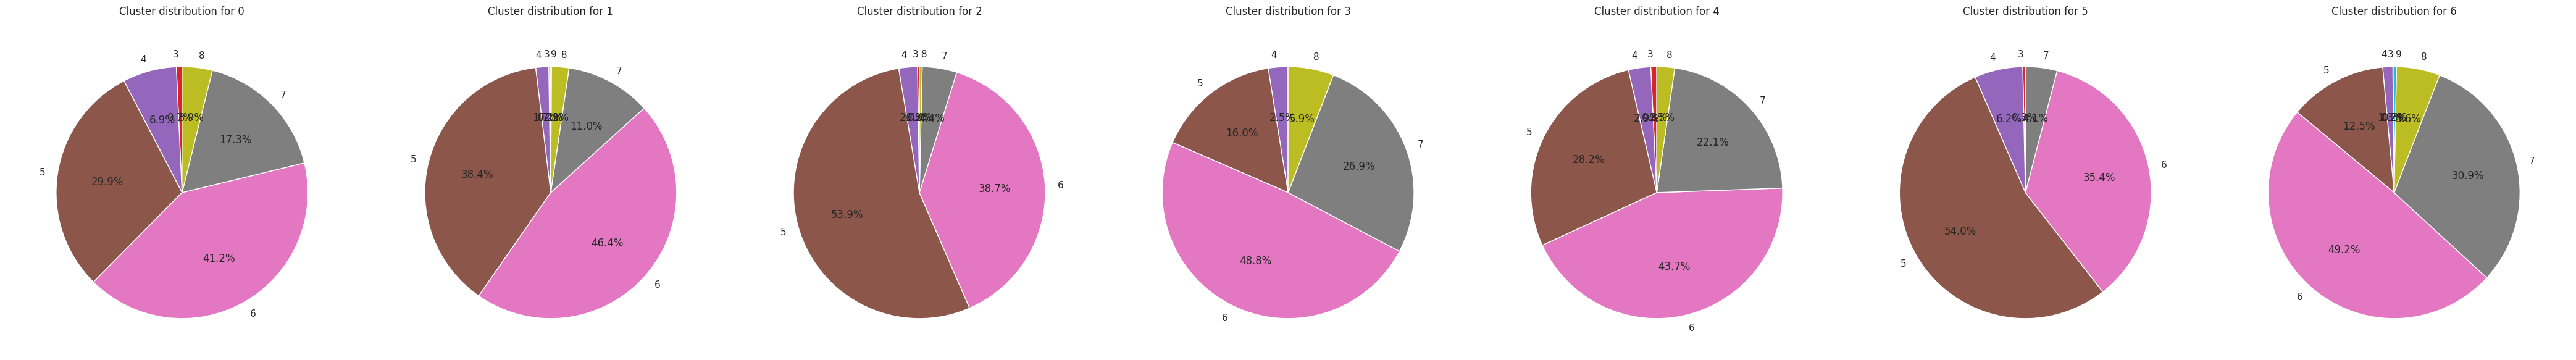

In [ ]:
plot_class_pie(df_pca.sort_values(by='Cluster'), 'Cluster', 'quality')

Se tiene que los clústeres no representan de manera adecuada a ninguna de las categorias de calidad asignadas, por lo que se deduce que esta **ha sido mal asignada en base a las características de los vinos**.

A continuación, se procede a analizar las características propias de cada clúster y su diferenciación con los demas.

In [ ]:
def diamantes(categorias, valores, maximo, neutro, colores):
    num_valores = len(valores)
    num_subplots = num_valores if num_valores % 4 == 0 else num_valores + 4 - (num_valores % 4)  # Ajusta para que haya un número completo de filas
    num_filas = num_subplots // 4  # Calcula el número de filas necesarias
    fig, axs = plt.subplots(num_filas, 4, figsize=(15, 6), subplot_kw=dict(polar=True))
    angulos = np.linspace(0, 2 * np.pi, len(categorias), endpoint=False).tolist()

    for i in range(num_valores):
        fila = i // 4  # Calcula el índice de fila
        col = i % 4  # Calcula el índice de columna
        axs[fila, col].fill(angulos, valores[i], color=colores[i], alpha=0.4, edgecolor='navy', linewidth=2)
        axs[fila, col].fill(angulos, [neutro]*len(valores[i]), color='none', edgecolor='red', linewidth=0.5)  # Línea roja
        axs[fila, col].set_yticklabels([])  # Ocultar las etiquetas de los ejes radiales
        axs[fila, col].set_xticks(angulos)
        axs[fila, col].set_xticklabels(categorias)
        axs[fila, col].set_ylim(0, maximo)  # Establecer el radio máximo como el valor máximo en la lista de valores
        axs[fila, col].set_title(f'Cluster {i}')

    # Oculta los subplots adicionales vacíos
    for i in range(num_valores, num_subplots):
        fila = i // 4
        col = i % 4
        axs[fila, col].axis('off')

    plt.subplots_adjust(hspace=0.5, wspace=0.5)

Se muestra el valor de cada componente del punto más representativo de cada clúster (**centroide**) en un **gráfico de radar**. La **linea roja delimitante** empleada representa el punto donde el valor de la **componente es neutra** (0), valores más cercanos al centro son negativos.

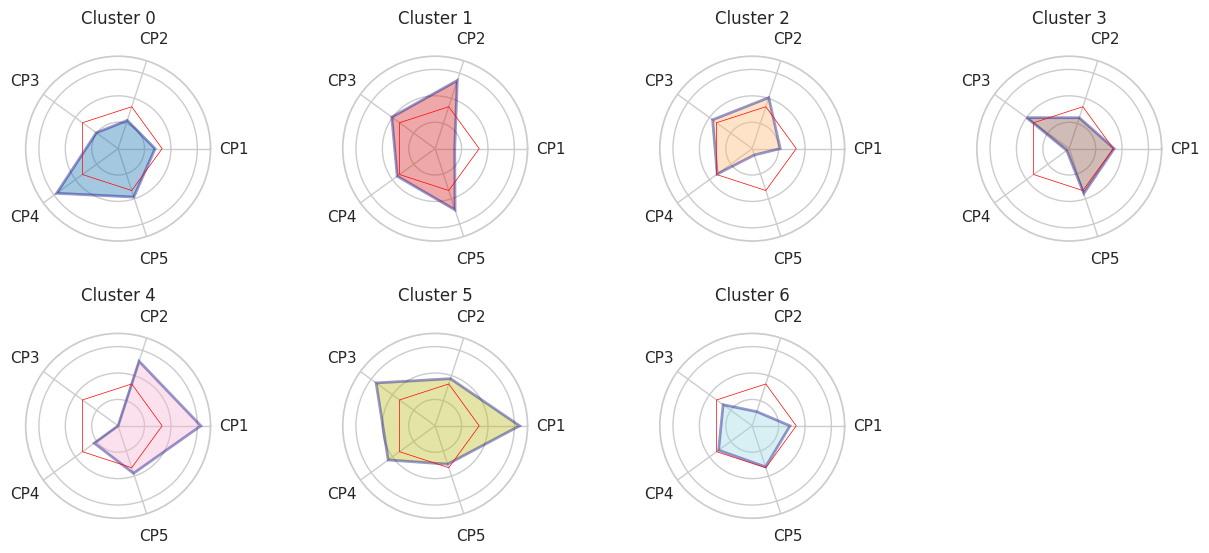

In [ ]:
diamantes(['CP1', 'CP2', 'CP3', 'CP4', 'CP5'], kmeans.cluster_centers_ - np.min(kmeans.cluster_centers_), 3.5, -np.min(kmeans.cluster_centers_), colores)

En base a los valores de las componentes se tiene que los clústeres cumplen con las siguientes características en base a las variables originales:

- **Clúster 0**: Este grupo de vinos se caracteriza por sus altos niveles de alcohol y ácido cítrico, acompañados de una presencia significativa de ácidos fijos. Además, presentan valores muy bajos de pH y sulfatos.
- **Clúster 1**: Los vinos de este grupo exhiben niveles prominentes de dióxido de azufre y azúcar residual, así como una densidad notable. Se distinguen por bajos niveles de ácido volátil o fijo, así como cloruros.
- **Clúster 2**: Este conjunto se caracteriza por altos niveles de cloruros y dióxido de azufre, aunque con un bajo contenido de azúcar residual, lo que resulta en un perfil más seco. Su sabor se define por una combinación equilibrada de estas características.
- **Clúster 3**: Los vinos de este clúster presentan un bajo nivel de alcohol, un pH elevado y una presencia notable de sulfitos y dióxido de azufre.
- **Clúster 4**: Caracterizados por un valor bajo de pH y una alta acidez, estos vinos destacan por su frescura y vitalidad. La presencia marcada de cloruros añade complejidad a su perfil sensorial.
- **Clúster 5**: Vinos con una abundancia de ácido volátil y cloruros. Aunque presentan bajos niveles de ácido fijo y cítrico, así como de dióxido de azufre.
- **Clúster 6**: Este grupo se distingue por su alta graduación alcohólica y baja densidad.

Además, se emplearán las siguientes métricas para calibrar la diferencia entre los clusteres:

- **Inertia**: La inercia mide qué tan compactos están los clústers. Se calcula como la suma de las distancias cuadradas de cada muestra al centro del clúster más cercano. Un valor más bajo de inercia indica clústers más compactos.
- **Silhouette Score**: Esta métrica calcula qué tan similares son los puntos en un clúster entre sí y qué tan separados están de los puntos en los clusters vecinos. El valor varía entre -1 y 1, donde un valor alto indica que los puntos están bien agrupados y separados.
- **Davies-Bouldin Score**: Esta métrica calcula la "bondad" de los clústers al considerar la dispersión dentro de los clústers y la distancia entre los clústers. Un valor más bajo indica clústers mejor definidos.
- **Calinski-Harabasz Index**: Esta métrica también evalúa qué tan separados están los clústers. Un valor más alto sugiere clústers más densos y mejor definidos.

In [ ]:
# Calcular Inertia
inertia = kmeans.inertia_

# Calcular Silhouette Score
silhouette_avg = silhouette_score(df_scaled, clusters)

# Calcular Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(df_scaled, clusters)

# Calcular Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(df_scaled, clusters)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Score:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Inertia: 13898.867574642452
Silhouette Score: 0.21398040117076159
Davies-Bouldin Score: 1.3482017350560747
Calinski-Harabasz Index: 1348.8809538924884


- La **inercia** de aproximadamente **13898** sugiere que los clústers no son extremadamente compactos, pero el valor debe compararse con otros modelos o configuraciones de clústers para evaluar su calidad relativa. Este análisis fue realizado al aplicar el método del codo, mostrando la optimidad de los clústeres obtenidos.
- El **Silhouette Score** de alrededor de **0.21** indica que los clústers están algo separados pero podrían haber superposiciones.
- El **Davies-Bouldin Score** de aproximadamente **1.34** sugiere que la partición es relativamente buena.
- El **Calinski-Harabasz Index** de alrededor de **1348** indica que los clústers son relativamente densos y bien definidos.

# **Ejercicio 4**

Para abordar la mejora en el proceso de producción de vinos, se contempla la implementación de técnicas de agrupamiento jerárquico. Esta estrategia está diseñada para segmentar los vinos en diferentes grupos o clústeres basados en características como sus componentes, la calidad y el nivel de alcohol.

El agrupamiento jerárquico es particularmente útil en contextos como este porque permite una visualización clara de cómo se relacionan los diferentes tipos de vinos entre sí, a través de un dendrograma que muestra las relaciones de similitud entre grupos. Este enfoque también facilita la identificación de los vinos más representativos de cada clúster, permitiendo a la empresa concentrar sus esfuerzos de mejora en las características más destacadas de cada grupo.

La aplicación de este análisis no solo proporcionará una mejor comprensión de la diversidad actual de los vinos producidos, sino que también orientará decisiones sobre ajustes en el proceso de producción para potenciar la calidad del producto final, adaptándose a patrones específicos y preferencias detectadas en cada segmento de vinos.

## **Elección de los 10 ejemplos más representativos**
Para seleccionar los 10 ejemplos más representativos de cada clúster, se ha utilizado un criterio basado en la distancia euclidea entre cada punto de un clúster y el centroide correspondiente.

Obtener los puntos que se buscan mediante el **cálculo de la distancia al centroide** es una buena opción, ya que el centroide es representativo de las características de ese clúster al ser el punto que representa el promedio de todas las muestras en un grupo.


### **¿Por qué es una buena elección?**
Una vez obtenidas estas distancias, se toman los 10 puntos más cercanos al centroide. La **distancia mínima al centroide** es una buena opción para seleccionar los ejemplos de cada clúster por varias razones:

1. **Homogeneidad de características**:
   - Los vinos más cercanos al centroide comparten características promedio del clúster, como el nivel de alcohol, acidez, azúcares y otros componentes químicos.
   - Esto permite obtener un subconjunto que refleje de manera coherente las propiedades que caracterizan a cada tipo de vino en el grupo.

2. **Identificación clara del perfil**:
   - Al estar cerca del centroide, los vinos seleccionados proporcionan un perfil claro de las propiedades principales del clúster.
   - Esto facilita la comprensión de cómo se agrupan los vinos en segmentos que corresponden a diferentes estilos, calidades o regiones.

3. **Eliminación de outliers - Planificación y producción**:
   - Los vinos más alejados tienden a ser outliers o datos extremos que pueden no representar bien el promedio del clúster. La distancia mínima garantiza que se eviten estos outliers, logrando así una representación más precisa y homogénea.
   - Contar con ejemplos representativos asegura que el proceso de producción y segmentación esté basado en vinos que reflejen el centro del clúster, permitiendo desarrollar estrategias productivas que estén en línea con la calidad esperada y la demanda de mercado para cada tipo de vino.


### **Otras alternativas**
También se probó a elegir dichos puntos mediante otros criterios como pueden ser la distancia máxima o media, entre otras. Sin embargo, esto puede causar problemas:

* **Distancia Máxima**:
     - Seleccionar los vinos más alejados del centroide puede incluir ejemplos con características atípicas o inusuales. Estos vinos pueden estar en los márgenes de calidad, componentes o nivel de alcohol, representando outliers en la producción. Tomar decisiones basadas en ejemplos extremos podría generar una estrategia de producción que no sea representativa del conjunto principal de vinos, llevando a un proceso ineficiente o a la sobreproducción de un tipo de vino que no es común.

* **Distancia Media**:
     - Usar la distancia media podría resultar en la selección de vinos que no representan las características centrales del clúster, al no tener estos una distribución homogénea, escogiendo ejemplos que podrían tener una variabilidad considerable.



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca.drop(['quality', 'wine type', 'Cluster'], axis=1))

# Entrenar K-means con k = 7
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)

# Crear un DataFrame para almacenar los 10 ejemplos más representativos de cada clúster
representative_indices = []

for cluster_num in range(7):
    # Encontrar índices de los puntos que pertenecen a este clúster
    indices_in_cluster = np.where(kmeans.labels_ == cluster_num)[0]

    # Obtener las características de los puntos en este clúster
    points_in_cluster = X_scaled[indices_in_cluster]

    # Calcular las distancias al centroide
    distances = cdist(points_in_cluster, [kmeans.cluster_centers_[cluster_num]], metric='euclidean').flatten()

    # Ordenar los índices según las distancias y tomar los 10 más cercanos
    sorted_indices = indices_in_cluster[np.argsort(distances)[:10]]

    # Agregar estos índices a la lista general
    representative_indices.extend(sorted_indices)

# Crear un nuevo DataFrame con solo los ejemplos representativos
df_representative = pd.DataFrame(X_scaled[representative_indices], columns=df_pca.drop(['quality', 'wine type', 'Cluster'], axis=1).columns)


# **Clustering jerárquico**

Para agrupar los diferentes tipos de vinos con el objetivo de mejorar la producción, el método de agrupamiento jerárquico **Ward** es la mejor opción, ya que **minimiza la varianza** dentro de cada clúster, generando **grupos más compactos y homogéneos**. Esto es esencial para mejorar la consistencia en la producción, dado que los grupos formados serán representativos y estarán bien definidos, ayudando a identificar con claridad las características principales que distinguen cada tipo. Además, la reducción de la variabilidad interna dentro de cada grupo facilita el análisis y asegura la efectividad en la segmentación de los vinos según sus componentes, calidad y nivel de alcohol.



### **Otras alternativas**
Antes de elegir uno, se han probado varios métodos de agrupamiento jerárquico, como `centroid`, `single`, `ward`, `average` y `complete`. Cada método tiene diferentes enfoques:

1. **Single Linkage (Distancia Mínima)**:
   - Usa la distancia mínima entre cualquier par de muestras en diferentes clusters.
  - **Desventaja**: Suele tener un efecto cadena. Esto significa que tiende a generar clusters alargados y dispersos, donde los puntos en un cluster pueden estar alejados entre sí, lo cual no es útil para definir claramente los tipos de vinos.

2. **Complete Linkage (Distancia Máxima)**:
   - Usa la distancia máxima entre cualquier par de muestras en diferentes clusters.
  - **Desventaja**: Falta de Consistencia. Puede generar clusters demasiado compactos, excluyendo ejemplos que deberían pertenecer al grupo según sus características, generando una segmentación menos representativa. Además, estos clústers no son necesariamente similares en tamaño.

3. **Centroid (Centroide)**:
   - Calcula la distancia entre centroides de los clústeres.
   - **Desventaja**: Inconsistencia. Los centroides pueden variar significativamente cuando los clústers tienen diferentes tamaños o distribuciones, dando lugar a grupos menos homogéneos y a veces inconsistentes.

4. **Average Linkage (Media de Distancias)**:
   - Calcula la media de las distancias entre todas las muestras de los clusters.
   - **Desventaja**: Puede ser más robusto que `single` pero puede producir grupos ligeramente heterogéneos. Por lo tanto, este método se suele usar cuando se buscan clusteres de tamaños muy diferentes (lo cual no es el caso para la segmentación de los vinos).

### **Conclusión**
El método de Ward es el más adecuado porque logra una agrupación más homogénea, compacta y bien definida, lo cual permite reducir al mínimo las diferencias internas, mejorando así la producción de vino. Aunque los otros métodos explicados pueden ser útiles en ciertos contextos, en este caso generarían clusters menos consistentes o representativos de las características de cada tipo de vino.

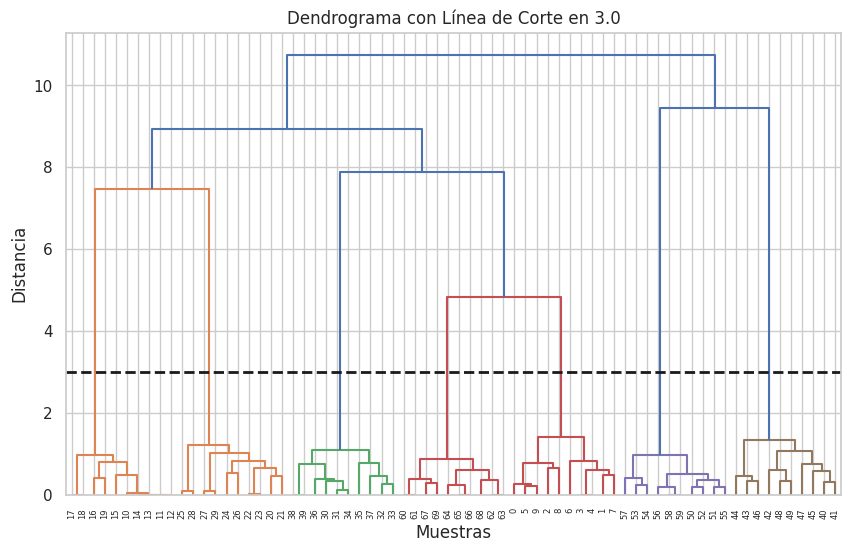

In [ ]:
# Establecemos el corte en una altura de 3.0 en el eje Y
# Aplicar clustering jerárquico al nuevo conjunto reducido
Z = linkage(df_representative, method='ward')
cluster_labels = fcluster(Z, t=2.0, criterion='distance')

# Crear un nuevo DataFrame con las etiquetas de los clusters
df_representative['Cluster'] = cluster_labels

# Generar el dendrograma y dibujar una línea de corte en 3.0
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.axhline(y=3.0, color='k', linestyle='--', linewidth=2)
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.title('Dendrograma con Línea de Corte en 3.0')
plt.show()


## **Interpretación dendrograma**

En un dendrograma de agrupamiento jerárquico, cada nodo representa una agrupación de datos basada en las similitudes entre las muestras.

### ¿Cómo interpretar el dendrograma?

* **Eje Y**: Representa la distancia o disimilitud entre las muestras cuando se forman los clusters. Cuanto más alto es el punto de unión entre dos ramas, más diferentes son los clusters.
* **Eje X**: Muestra los datos individuales etiquetados.
* **Ramas**: Cada bifurcación representa la unión de dos clusters. Las ramas más largas indican una distancia mayor entre ellos, implicando menos similitud.


### Observaciones:

* **Diversidad**:
   - Los clusters varían en la cantidad de datos que contienen.
   - La diferencia de alturas entre ramas sugiere que algunos clusters están más relacionados entre sí que otros.

  
### **Selección del Punto de Corte (Altura 3)**
* **Corte del dendrograma**: se hace un corte horizontalmente para obtener el número deseado de clusters. La elección del corte se basa en el nivel de similitud que se considere apropiado.

* Se elige un punto de **corte en el valor 3** del eje Y para identificar clusters claramente separados.
* **Por encima de este valor**, la distancia entre las bifurcaciones es considerablemente mayor, lo que indica una **varianza significativa** entre los clusters. Por ejemplo, si aumentamos la altura de corte, la separación en altura entre los clusters naranja y rojo respecto al resto del dendrograma aumenta considerablemnete, indicando que hay una gran diferencia entre ellos y otros grupos.
* Los clusters **por debajo** de la altura de 3 están **más unidos entre sí**, lo que sugiere una variabilidad interna mínima dentro de cada clúster.

### **Conclusión**
Cortar el dendrograma en el nivel de 3 **maximiza la varianza entre diferentes grupos y minimiza la variabilidad interna dentro de cada clúster**, proporcionando clusters que están claramente diferenciados entre sí. Este punto de corte permite identificar grupos de vinos que son internamente homogéneos, pero externamente distintos, lo que facilita mejorar la producción basada en estas características bien segmentadas.

## **Dendrograma tras el corte**

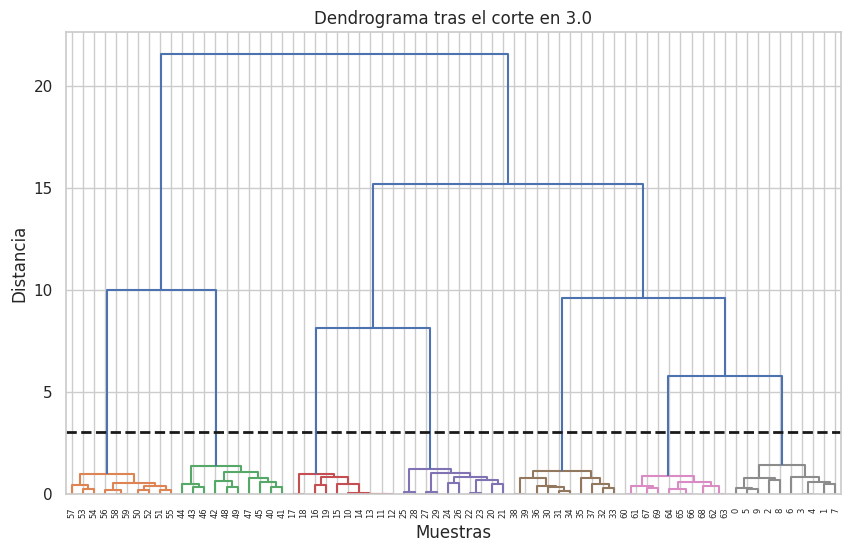

In [ ]:
# Calcular el enlace de agrupamiento
Z = linkage(df_representative, method='ward')
cluster_labels = fcluster(Z, t=3.0, criterion='distance')

# Crear un nuevo DataFrame con las etiquetas de los clusters
df_representative['Cluster'] = cluster_labels

# Generar el dendrograma y dibujar una línea de corte en 3.0
plt.figure(figsize=(10, 6))
dendrogram(Z, color_threshold=3.0)  # especifica el umbral de color
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.title('Dendrograma tras el corte en 3.0')
plt.axhline(y=3.0, color='k', linestyle='--', linewidth=2)
plt.show()

Tras realizar el corte a una altura de 3 en el eje Y, el dendrograma queda como se muestra, pudiendo observar 7 clústeres en total. Cada uno de ellos se relaciona de la siguiente manera con los clústeres del ejercicio anterior:

- Marron --> Cluster 3
- Rosa --> Cluster 6
- Gris --> Cluster 0
- Rojo --> Cluster 1
- Morado --> Cluster 2
- Naranja --> Cluster 5
- Verde --> Cluster 4

El dendrograma muestra que los clústeres rosa (6) y gris (0) son los más similares entre sí, siendo los primeros en unirse justo por encima de la línea de corte. Esto indica que comparten características muy cercanas, pudiendo formar un grupo más amplio entre ellos. Los siguientes en unirse son los clústeres rojo (1) y morado (2), que también tienen una similitud considerable, aunque menos que los anteriores. Por otro lado, los clústeres naranja (5) y verde (4) tardan más en unificarse, probablemente a que son los grupos principales que representan la variedad dentro del tipo de vino 1. Además, tambien se tiene que el cluster marrón (3), el cual representaba una mezcla entre los vinos de tipo 1 y tipo 2, tiene propiedades mas cercanas a los de tipo 2, debido a que se junta mas rapidamente con estos vinos que con los de tipo 1. Por último, tambien se tiene que los vinos de tipo 2 tienden a ser mas diversos, pues la unificación de todos los clusters que lo representan ocurre a una altura bastante más significativa que con los de tipo 1.